* Methodoly Reference:
* We looked at CorEx for topic modelling which does not rely on any of the generative assumptions of LDA-based topic models. This topic model seeks maximally informative topics as encoded by their total correlation paper :https://arxiv.org/pdf/1611.10277.pdf
Reference : Gallagher, R. J., Reing, K., Kale, D., & Ver Steeg, G. (2018). Anchored correlation explanation: Topic modeling with minimal domain knowledge. Information Sciences Institute, University of Southern California, and Vermont Complex Systems Center, Computational Story Lab, University of Vermont.

* Topic modeling and sentiment analysis was  utilized to analyze Twitter data from the State of the Nation to gain valuable insights into the opinions and views of the general public.
While sentiment analysis can detect the sentiment conveyed in a piece of text, Corex is a topic modelling technique that can identify numerous topics inside a single text.
By identifying the most major themes and understanding the attitudes and feelings expressed towards them, the combination of different methodologies can provide a more comprehensive picture of the State of the Nation.
These methods provide a flexible and efficient way to examine large quantities of social media data in order to fully understand public sentiment and views. 

In [38]:
import pandas as pd
import re
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from langdetect import detect
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from contractions import contractions_dict
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns

from corextopic.corextopic import Corex
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import gensim
import gensim.corpora as corpora
import corextopic as ct
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import emoji

In [39]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nadiera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nadiera/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/nadiera/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Loading Sliced Dataframes

In [40]:
tweets_2020=pd.read_csv('tweets_2020.csv')
tweets_2020.head()

/tmp/ipykernel_4158317/1476444923.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_2020=pd.read_csv('tweets_2020.csv')


Unnamed: 0                           _type  \
0    4238685  snscrape.modules.twitter.Tweet   
1    4238686  snscrape.modules.twitter.Tweet   
2    4238687  snscrape.modules.twitter.Tweet   
3    4238688  snscrape.modules.twitter.Tweet   
4    4238689  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/fabio_sona/status/13447953...   
1  https://twitter.com/ferraricolombia/status/134...   
2  https://twitter.com/ArtieDoesen/status/1344795...   
3  https://twitter.com/sona_0e0/status/1344794950...   
4  https://twitter.com/fabio_sona/status/13447949...   

                        date  \
0  2020-12-31 23:59:33+00:00   
1  2020-12-31 23:59:26+00:00   
2  2020-12-31 23:58:11+00:00   
3  2020-12-31 23:57:55+00:00   
4  2020-12-31 23:57:44+00:00   

                                          rawContent  \
0                                    @G4KLX Will do.   
1  Sona de talleres de honda RACING cortesía bell...   
2  @Tojoafterdark seeing your sona always kills m...   
3  2021年一曲目はこれ〜〜 #ASKA  #あけおめ https://t.co/bukik2...   
4  @NOSTATO Meglio che stia nella sua comfort zon...   

                                     renderedContent                   id  \
0                                    @G4KLX Will do.             15863442   
1  Sona de talleres de honda RACING cortesía bell...            120919310   
2  @Tojoafterdark seeing your sona always kills m...  1102657205290061824   
3  2021年一曲目はこれ〜〜 #ASKA  #あけおめ https://t.co/bukik2...   964101382587297792   
4  @NOSTATO Meglio che stia nella sua comfort zon...             15863442   

  replyCount retweetCount likeCount  ...      time         username  \
0          0            0         1  ...  23:59:33       fabio_sona   
1          0            0         0  ...  23:59:26  ferraricolombia   
2          0            0         2  ...  23:58:11      ArtieDoesen   
3          0            0        24  ...  23:57:55         sona_0e0   
4          0            1         2  ...  23:57:44       fabio_sona   

                                         description verified followersCount  \
0  Engineer - Alumnus PoliMi, hamradio (IK2WQH).\...    False          513.0   
1  Cuenta oficial de Ferrari y sus fanáticos en C...    False         1433.0   
2  🔞23||enby(they/them)||gay deer||DMs open||open...    False         2086.0   
3  まいにぢありがどがんす。Fellowsです。ASKA関連のつぶやきが多いです。少しだけドリ(...    False          222.0   
4  Engineer - Alumnus PoliMi, hamradio (IK2WQH).\...    False          513.0   

  friendsCount statusesCount favouritesCount            location popularity  
0        639.0       24632.0         27454.0         Milan Italy    53239.0  
1       1779.0        3849.0            64.0  Medellín, Colombia     7125.0  
2       1000.0       13068.0         30775.0         Seattle, WA    46931.0  
3        180.0       22465.0         22267.0                 NaN    45158.0  
4        639.0       24632.0         27454.0         Milan Italy    53241.0  

[5 rows x 43 columns]

In [41]:
tweets_2021=pd.read_csv('tweets_2021.csv')
tweets_2021.head()

/tmp/ipykernel_4158317/4160245672.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_2021=pd.read_csv('tweets_2021.csv')


Unnamed: 0                           _type  \
0    2383943  snscrape.modules.twitter.Tweet   
1    2383944  snscrape.modules.twitter.Tweet   
2    2383945  snscrape.modules.twitter.Tweet   
3    2383946  snscrape.modules.twitter.Tweet   
4    2383947  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/Wil_deleon9/status/1477067...   
1  https://twitter.com/crrriiii/status/1477066919...   
2  https://twitter.com/faemorrigan_/status/147706...   
3  https://twitter.com/DisneyPlusJP/status/147706...   
4  https://twitter.com/Richard75432/status/147706...   

                        date  \
0  2021-12-31 23:59:55+00:00   
1  2021-12-31 23:59:30+00:00   
2  2021-12-31 23:58:58+00:00   
3  2021-12-31 23:58:32+00:00   
4  2021-12-31 23:58:04+00:00   

                                          rawContent  \
0  Porque para que algo funcione el interés y la ...   
1         @sona_claudio siete bellissimi, auguri 💓💓💓   
2  @bunnigraveyard OH Y GOD THIS IS SO COOL i wil...   
3  @SONA_Y_214\n🎊🎍𝐇𝐚𝐩𝐩𝐲 𝐍𝐞𝐰 𝐘𝐞𝐚𝐫🎍🎊\n\nあなたにお届けするのは...   
4  @dmaree614 @SunshinePeach9 @valentinifrank @do...   

                                     renderedContent                     id  \
0  Porque para que algo funcione el interés y la ...  1350454264339030016.0   
1         @sona_claudio siete bellissimi, auguri 💓💓💓           2755670197.0   
2  @bunnigraveyard OH Y GOD THIS IS SO COOL i wil...  1063251006383898624.0   
3  @SONA_Y_214\n🎊🎍𝐇𝐚𝐩𝐩𝐲 𝐍𝐞𝐰 𝐘𝐞𝐚𝐫🎍🎊\n\nあなたにお届けするのは...  1011356094797570048.0   
4  @dmaree614 @SunshinePeach9 @valentinifrank @do...  1004926156439617536.0   

  replyCount retweetCount likeCount  ...      time      username  \
0          0            0         0  ...  23:59:55   Wil_deleon9   
1          0            0         0  ...  23:59:30      crrriiii   
2          1            0         0  ...  23:58:58  faemorrigan_   
3          0            0         1  ...  23:58:32  DisneyPlusJP   
4          1            0         1  ...  23:58:04  Richard75432   

                                         description verified followersCount  \
0  daily life experiences•civil engineer👷•\nsport...    False           27.0   
1  una volta qualcuno mi scrisse: 'riesci a farti...    False          592.0   
2  king of being cringe on the internet! comic & ...    False         2233.0   
3  ディズニー + ピクサー + マーベル + スター・ウォーズ + ナショジオ + スター作品...     True       412372.0   
4                                                NaN    False          190.0   

  friendsCount statusesCount favouritesCount                       location  \
0        232.0        1099.0           779.0                            NaN   
1        511.0        7122.0         68952.0                       she/her    
2        870.0       15739.0         63819.0  they/xe | 19 | white enby les   
3         40.0      734362.0             3.0                            NaN   
4        283.0        8409.0         39680.0                            NaN   

  popularity  
0     2137.0  
1    77177.0  
2    82662.0  
3  1146778.0  
4    48564.0  

[5 rows x 43 columns]

In [42]:
tweets_2022=pd.read_csv('tweets_2022.csv')
tweets_2022.head()

/tmp/ipykernel_4158317/3082145300.py:1: DtypeWarning: Columns (0,6,7,8,9,10,11,20,28,29,30,31,36) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_2022=pd.read_csv('tweets_2022.csv')


Unnamed: 0                           _type  \
0     282801  snscrape.modules.twitter.Tweet   
1     282802  snscrape.modules.twitter.Tweet   
2     282803  snscrape.modules.twitter.Tweet   
3     282804  snscrape.modules.twitter.Tweet   
4     282805  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/Lighterium/status/16093385...   
1  https://twitter.com/batsoupart/status/16093384...   
2  https://twitter.com/danniebear87/status/160933...   
3  https://twitter.com/PetrarchEleven/status/1609...   
4  https://twitter.com/ti_psy_/status/16093381314...   

                        date  \
0  2022-12-31 23:59:34+00:00   
1  2022-12-31 23:59:30+00:00   
2  2022-12-31 23:59:15+00:00   
3  2022-12-31 23:58:07+00:00   
4  2022-12-31 23:58:05+00:00   

                                          rawContent  \
0  Everyone should have a bunny sona for the new ...   
1  Amazingly beautiful catbird hybrid sona artfre...   
2  My #GH review https://t.co/KcugeZOH8u #Sprina ...   
3  @pawemoji I really wish I could hug your sona -3-   
4  소나(Sona, 聡奈)\n이쪽은 일본인은 아닌데 일본에 살긴 해요\n하긴 레니빙임\...   

                                     renderedContent                   id  \
0  Everyone should have a bunny sona for the new ...           2472211056   
1  Amazingly beautiful catbird hybrid sona artfre...   954056161615114242   
2  My #GH review youtu.be/d8HJjIowamw #Sprina #So...             46103957   
3  @pawemoji I really wish I could hug your sona -3-   967143544854020097   
4  소나(Sona, 聡奈)\n이쪽은 일본인은 아닌데 일본에 살긴 해요\n하긴 레니빙임\...  1082636719046852608   

  replyCount retweetCount likeCount  ...      time        username  \
0          5            5        49  ...  23:59:34      Lighterium   
1          2           46       153  ...  23:59:30      batsoupart   
2          0            0         0  ...  23:59:15    danniebear87   
3          0            0         1  ...  23:58:07  PetrarchEleven   
4          1            0         1  ...  23:58:05         ti_psy_   

                                         description verified followersCount  \
0  Xei ✦  He / him ✦2D/3D art ✦ 🇧🇷🏳️‍🌈🏳️‍⚧️ auDHD...    False         5844.0   
1  local oppressed furry || sfw || any pronouns |...    False         1511.0   
2  Random weird chick with a dirty mind. 🍟 lova. ...    False         1913.0   
3  Icon by @DavidToons_!\nHe/Him\nVA for @Fluffal...    False          125.0   
4                                   明けない夜に失いかけた声をあげて    False          287.0   

  friendsCount statusesCount favouritesCount          location popularity  
0       2046.0       41592.0         57467.0               NaN   107008.0  
1        127.0        1054.0          1141.0               NaN     4034.0  
2       1927.0      386068.0         86405.0  Newport News, VA   476313.0  
3        219.0        4529.0          6140.0   New Jersey, USA    11014.0  
4        292.0      123646.0           277.0                 愛   124504.0  

[5 rows x 43 columns]

In [6]:
tweets_2023=pd.read_csv('tweets_2023.csv')
tweets_2023.head()

/tmp/ipykernel_4158317/3013074603.py:1: DtypeWarning: Columns (0,6,7,8,9,10,20,26,28,29,30,31,36) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_2023=pd.read_csv('tweets_2023.csv')


Unnamed: 0                           _type  \
0          0  snscrape.modules.twitter.Tweet   
1          1  snscrape.modules.twitter.Tweet   
2          2  snscrape.modules.twitter.Tweet   
3          3  snscrape.modules.twitter.Tweet   
4          4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/ThatoYaMmopi/status/162372...   
1  https://twitter.com/AiSuuVoiSona/status/162372...   
2  https://twitter.com/clarencesdb/status/1623729...   
3  https://twitter.com/Aashiek/status/16237292013...   
4  https://twitter.com/missmanhissa/status/162372...   

                        date  \
0  2023-02-09 17:03:14+00:00   
1  2023-02-09 17:03:12+00:00   
2  2023-02-09 17:03:08+00:00   
3  2023-02-09 17:03:03+00:00   
4  2023-02-09 17:03:02+00:00   

                                          rawContent  \
0  The drama all Saffas been waiting for has just...   
1  @kevinsynthv what does it say im blocked kiss ...   
2  Let the circus begin....#SONA https://t.co/Yzl...   
3  Here we go again. We are on our own in this co...   
4                 SONA has begun. Drama awaits us.😩😭   

                                     renderedContent                   id  \
0  The drama all Saffas been waiting for has just...            337366251   
1  @kevinsynthv what does it say im blocked kiss ...  1406025658405429251   
2  Let the circus begin....#SONA https://t.co/Yzl...            301285218   
3  Here we go again. We are on our own in this co...             22466506   
4                 SONA has begun. Drama awaits us.😩😭            944056435   

  replyCount retweetCount likeCount  ...      time      username  \
0          0            0         0  ...  17:03:14  ThatoYaMmopi   
1          0            0         0  ...  17:03:12  AiSuuVoiSona   
2          0            0         0  ...  17:03:08   clarencesdb   
3          0            0         0  ...  17:03:03       Aashiek   
4          0            0         0  ...  17:03:02  missmanhissa   

                                         description verified followersCount  \
0  I Am Powered By God And I Believe In Happiness...    False         1410.0   
1                                       silent bob !    False          124.0   
2  love life in all its forms.working for & guidi...    False         7378.0   
3  Eternal underachiever. Sub 3hr marathon finish...    False          820.0   
4  https://t.co/mSq0TJcOuo\nLegal mind⚖\nRadio Ho...    False         2128.0   

  friendsCount statusesCount favouritesCount                     location  \
0        808.0       26650.0           117.0                    Bohlokong   
1        166.0        4748.0         11718.0                          NaN   
2       6319.0      272621.0         69606.0  Johannesburg , South Africa   
3       2248.0       50027.0          8238.0                    Cape Town   
4       1221.0       22874.0         15937.0                          NaN   

  popularity  
0    28985.0  
1    16756.0  
2   355924.0  
3    61333.0  
4    42160.0  

[5 rows x 43 columns]

In [43]:
print(tweets_2020.shape,tweets_2021.shape,tweets_2022.shape,tweets_2023.shape)

(1136983, 43) (2013168, 43) (2101390, 43) (284700, 43)


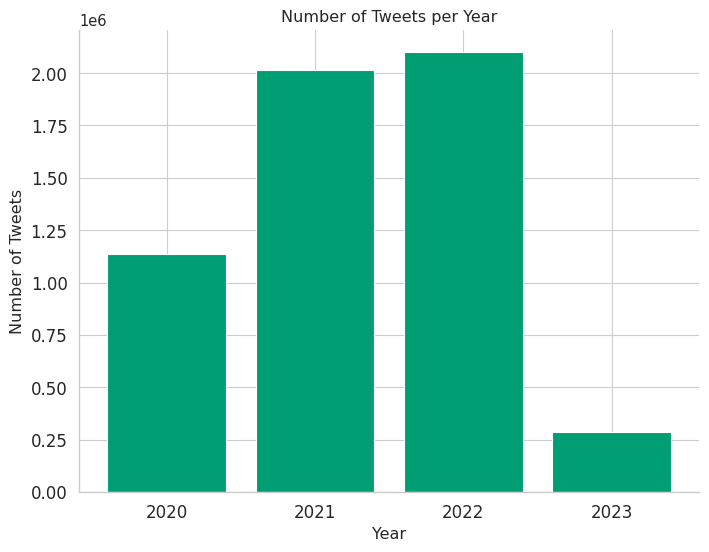

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define data
years = ['2020', '2021', '2022', '2023']
tweet_counts = [tweets_2020.shape[0], tweets_2021.shape[0], tweets_2022.shape[0], tweets_2023.shape[0]]

# Set style and context with Seaborn
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Create a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(years, tweet_counts, color=sns.color_palette("colorblind")[2])

# Add axis labels and a title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Tweets')
ax.set_title('Number of Tweets per Year')

# Customize tick labels
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Remove spines
sns.despine()
# Save the figure in PNG format
fig.savefig('Presentations/Number of Tweets per Year.png' ,format='png', dpi=1000,transparent=True)


# Show the plot
plt.show()



### Dropping Null values in rawContent Column

In [45]:
tweets_2020.dropna(subset=['rawContent'], inplace=True)
tweets_2021.dropna(subset=['rawContent'], inplace=True)
tweets_2022.dropna(subset=['rawContent'], inplace=True)
tweets_2023.dropna(subset=['rawContent'], inplace=True)

In [10]:
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from textblob import TextBlob
# from contractions import contractions_dict

# def clean_tweet(text):
#     # Remove emojis
#     emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags=re.UNICODE)
#     text = emoji_pattern.sub(r'', text)
#     # Remove URLs, mentions, hashtags, and special characters
#     text = re.sub(r"http\S+", "", text) # remove URLs
#     text = re.sub(r"@\w+", "", text) # remove mentions
#     text = re.sub(r"#\w+", "", text) # remove hashtags
#     text = re.sub(r"[^a-zA-Z\s]+", "", text) # remove special characters
#     # Expand contractions
#     words = text.split()
#     new_words = []
#     for word in words:
#         if word.lower() in contractions_dict:
#             new_words.append(contractions_dict[word.lower()])
#         else:
#             new_words.append(word)
#     text = " ".join(new_words)
#     # Correct spelling and grammar
#     text = str(TextBlob(text).correct())
#     # Tokenize the tweet text
#     tokens = nltk.word_tokenize(text)
#     # Remove stop words
#     stop_words = set(stopwords.words("english"))
#     filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
#     # Lemmatize the words and assign POS tags
#     tagged_tokens = nltk.pos_tag(filtered_tokens)
#     lemmatizer = WordNetLemmatizer()
#     lemmatized_tokens = []
#     for word, tag in tagged_tokens:
#         if tag.startswith('N'): # noun
#             lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='n'))
#         elif tag.startswith('V'): # verb
#             lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='v'))
#         elif tag.startswith('J'): # adjective
#             lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='a'))
#         elif tag.startswith('R'): # adverb
#             lemmatized_tokens.append(lemmatizer.lemmatize(word, pos='r'))
#         else:
#             lemmatized_tokens.append(lemmatizer.lemmatize(word))
#     Join the cleaned tokens back into a string
#     cleaned_text = " ".join(lemmatized_tokens)
#     return cleaned_text


In [11]:


# def clean_tweet(text):
#     # Remove emojis
#     emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags=re.UNICODE)
#     text = emoji_pattern.sub(r'', text)
#     # Remove special characters, URLs, and mentions
#     text = re.sub(r"[^a-zA-Z0-9\s]+", '', text)
#     text = re.sub(r"http\S+", "", text)
#     text = re.sub(r"@\w+", "", text)
#     # Convert to lowercase
#     text = text.lower()
#     return text


### Defining Cleaning Function :

In [81]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_tweet(text):
    # Remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r"http\S+", "", text) # remove URLs
    text = re.sub(r"@\w+", "", text) # remove mentions
    text = re.sub(r"#\w+", "", text) # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]+", "", text) # remove special characters
    # Tokenize the tweet text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join the cleaned tokens back into a string
    cleaned_text = " ".join(lemmatized_tokens)
    return cleaned_text


### Defining Sentiment Analysis Function :

In [57]:
def perform_sentiment_analysis(df):
    sid = SentimentIntensityAnalyzer()
    df['sentiment'] = df['rawContent'].apply(lambda x: sid.polarity_scores(x)['compound'])
    return df[df['rawContent'].notnull() & (df['rawContent'].apply(lambda x: detect(x)) == 'en')]

### Function to Extract Top Hashtags :

In [48]:
def get_top_hashtags(df):
    import re
    from collections import Counter

    def extract_hashtags(text):
        hashtags = re.findall(r'\#\w+', text)
        return hashtags

    hashtags = Counter()

    for index, row in df.iterrows():
        hashtags.update(extract_hashtags(row['rawContent']))

    top_hashtags = hashtags.most_common(10)

    return top_hashtags

In [49]:
dfs = [tweets_2020, tweets_2021, tweets_2022, tweets_2023]
top_hashtags_list = [get_top_hashtags(df) for df in dfs]

In [50]:
top_hashtags_list

[[('#NowPlaying', 8587),
  ('#Vanilla_Deep', 8483),
  ('#sona', 2473),
  ('#SONA2020', 2297),
  ('#AyasofyaCamii', 1926),
  ('#furry', 1693),
  ('#emlakveemlakyönetimi', 1652),
  ('#EndSARS', 1647),
  ('#art', 1487),
  ('#furryart', 1444)],
 [('#TheSims4', 15297),
  ('#sona', 5941),
  ('#KRPKAB3', 5931),
  ('#furry', 3501),
  ('#art', 3417),
  ('#SONA', 3297),
  ('#Sona', 3221),
  ('#furryart', 3102),
  ('#digitalart', 2741),
  ('#SONA2021', 2729)],
 [('#sona', 8969),
  ('#Sona', 8193),
  ('#art', 4866),
  ('#furry', 4525),
  ('#furryart', 3965),
  ('#GH', 3871),
  ('#oc', 3441),
  ('#digitalart', 3399),
  ('#SONA', 3086),
  ('#SONA2022', 2461)],
 [('#AdanaAdliyesi', 1604),
  ('#13OcaktaTahliyeBekliyoruz', 1349),
  ('#sona', 1177),
  ('#SONA', 1097),
  ('#Sona', 1000),
  ('#UzmanÇavuş', 905),
  ('#SONA2023', 856),
  ('#art', 648),
  ('#furry', 647),
  ('#MeclisStajıOyla', 567)]]

In [17]:
#Filtering out non-english tweets languages to reduce noise 

In [51]:
tweets_2020 = tweets_2020[tweets_2020['lang'] == 'en']
tweets_2021 = tweets_2021[tweets_2021['lang'] == 'en']
tweets_2022 = tweets_2022[tweets_2022['lang'] == 'en']
tweets_2023 = tweets_2023[tweets_2023['lang'] == 'en']


In [52]:
dfs = [tweets_2020, tweets_2021, tweets_2022, tweets_2023]
top_hashtags_list = [get_top_hashtags(df) for df in dfs]

In [20]:
top_hashtags_list

[[('#sona', 1848),
  ('#furry', 1622),
  ('#furryart', 1385),
  ('#art', 1358),
  ('#SONA2020', 1137),
  ('#digitalart', 1050),
  ('#EndSARS', 799),
  ('#AmongUs', 766),
  ('#fursona', 704),
  ('#SONA', 676)],
 [('#KRPKAB3', 4980),
  ('#sona', 4785),
  ('#furry', 3348),
  ('#art', 3159),
  ('#furryart', 2981),
  ('#SONA', 2666),
  ('#digitalart', 2550),
  ('#Sona', 2195),
  ('#oc', 1989),
  ('#SONA2021', 1836)],
 [('#sona', 7218),
  ('#Sona', 6216),
  ('#art', 4406),
  ('#furry', 4298),
  ('#furryart', 3775),
  ('#GH', 3649),
  ('#digitalart', 3100),
  ('#oc', 3030),
  ('#SONA', 2287),
  ('#SONA2022', 1869)],
 [('#sona', 965),
  ('#SONA', 909),
  ('#SONA2023', 800),
  ('#Sona', 695),
  ('#furry', 615),
  ('#art', 577),
  ('#furryart', 536),
  ('#GH', 451),
  ('#digitalart', 422),
  ('#oc', 419)]]

In [79]:
tweets_2020


Unnamed: 0                           _type  \
0          4238685  snscrape.modules.twitter.Tweet   
1          4238686  snscrape.modules.twitter.Tweet   
2          4238687  snscrape.modules.twitter.Tweet   
3          4238688  snscrape.modules.twitter.Tweet   
4          4238689  snscrape.modules.twitter.Tweet   
...            ...                             ...   
1136978    5257987  snscrape.modules.twitter.Tweet   
1136979    5257988  snscrape.modules.twitter.Tweet   
1136980    5257989  snscrape.modules.twitter.Tweet   
1136981    5257990  snscrape.modules.twitter.Tweet   
1136982    5257991  snscrape.modules.twitter.Tweet   

                                                       url  \
0        https://twitter.com/fabio_sona/status/13447953...   
1        https://twitter.com/ferraricolombia/status/134...   
2        https://twitter.com/ArtieDoesen/status/1344795...   
3        https://twitter.com/sona_0e0/status/1344794950...   
4        https://twitter.com/fabio_sona/status/13447949...   
...                                                    ...   
1136978  https://twitter.com/goldenbammy/status/1280289...   
1136979  https://twitter.com/kosi_annie/status/12802890...   
1136980  https://twitter.com/rihanat_sona/status/128028...   
1136981  https://twitter.com/Antonio24895012/status/128...   
1136982  https://twitter.com/rihanat_sona/status/128028...   

                              date  \
0        2020-12-31 23:59:33+00:00   
1        2020-12-31 23:59:26+00:00   
2        2020-12-31 23:58:11+00:00   
3        2020-12-31 23:57:55+00:00   
4        2020-12-31 23:57:44+00:00   
...                            ...   
1136978  2020-07-06 23:55:07+00:00   
1136979  2020-07-06 23:54:36+00:00   
1136980  2020-07-06 23:54:28+00:00   
1136981  2020-07-06 23:54:24+00:00   
1136982  2020-07-06 23:54:17+00:00   

                                                rawContent  \
0                                          @G4KLX Will do.   
1        Sona de talleres de honda RACING cortesía bell...   
2        @Tojoafterdark seeing your sona always kills m...   
3        2021年一曲目はこれ〜〜 #ASKA  #あけおめ https://t.co/bukik2...   
4        @NOSTATO Meglio che stia nella sua comfort zon...   
...                                                    ...   
1136978        @rihanat_sona Location?? I wan eat Jollof 😂   
1136979                                 @rihanat_sona Uwc❤   
1136980                     @goldenbammy Amen.. Thanks b❤❤   
1136981  Acaba de publicar una foto en Soná, Veraguas, ...   
1136982                            @Crystabel____ Thanks b   

                                           renderedContent  \
0                                          @G4KLX Will do.   
1        Sona de talleres de honda RACING cortesía bell...   
2        @Tojoafterdark seeing your sona always kills m...   
3        2021年一曲目はこれ〜〜 #ASKA  #あけおめ https://t.co/bukik2...   
4        @NOSTATO Meglio che stia nella sua comfort zon...   
...                                                    ...   
1136978        @rihanat_sona Location?? I wan eat Jollof 😂   
1136979                                 @rihanat_sona Uwc❤   
1136980                     @goldenbammy Amen.. Thanks b❤❤   
1136981  Acaba de publicar una foto en Soná, Veraguas, ...   
1136982                            @Crystabel____ Thanks b   

                          id replyCount retweetCount likeCount  ...      time  \
0                   15863442          0            0         1  ...  23:59:33   
1                  120919310          0            0         0  ...  23:59:26   
2        1102657205290061824          0            0         2  ...  23:58:11   
3         964101382587297792          0            0        24  ...  23:57:55   
4                   15863442          0            1         2  ...  23:57:44   
...                      ...        ...          ...       ...  ...       ...   
1136978  1219689773952126977          1            0         0  ...  23:55:07   
1136979  1051598611

In [82]:
# Apply the clean_tweet function to each data frame
tweets_2020["cleaned_text"] = tweets_2020["rawContent"].apply(clean_tweet)
tweets_2021["cleaned_text"] = tweets_2021["rawContent"].apply(clean_tweet)
tweets_2022["cleaned_text"] = tweets_2022["rawContent"].apply(clean_tweet)
tweets_2023["cleaned_text"] = tweets_2023["rawContent"].apply(clean_tweet)

TypeError: expected string or bytes-like object

In [ ]:
tweets_2020

In [23]:
#removing all unwanted and irrelevant tweets 

In [24]:
hashtags_to_remove = ['#furry', '#furryart', '#art','#digitalart','#AmongUs','#fursona','#KRPKAB3','#oc','#GH']


In [25]:
tweets_2020= tweets_2020[~tweets_2020['rawContent'].str.contains('|'.join(hashtags_to_remove))]
tweets_2021= tweets_2021[~tweets_2021['rawContent'].str.contains('|'.join(hashtags_to_remove))]
tweets_2022= tweets_2022[~tweets_2022['rawContent'].str.contains('|'.join(hashtags_to_remove))]
tweets_2023= tweets_2023[~tweets_2023['rawContent'].str.contains('|'.join(hashtags_to_remove))]


In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the Vader analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply Vader sentiment analysis to each data frame
tweets_2020["vader_sentiment"] = tweets_2020["rawContent"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
tweets_2021["vader_sentiment"] = tweets_2021["rawContent"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
tweets_2022["vader_sentiment"] = tweets_2022["rawContent"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
tweets_2023["vader_sentiment"] = tweets_2023["rawContent"].apply(lambda x: analyzer.polarity_scores(x)["compound"])


AttributeError: 'float' object has no attribute 'encode'

In [27]:
# # Analyze the sentiment for each data frame
# tweets_2020["sentiment"] = tweets_2020["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
# tweets_2021["sentiment"] = tweets_2021["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
# tweets_2022["sentiment"] = tweets_2022["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
# tweets_2023["sentiment"] = tweets_2023["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [28]:
# tweets_2020["sentiment"] = tweets_2020["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
# tweets_2021["sentiment"] = tweets_2021["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
# tweets_2022["sentiment"] = tweets_2022["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
# tweets_2023["sentiment"] = tweets_2023["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

tweets_2020.loc[:, "sentiment"] = tweets_2020["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_2021.loc[:, "sentiment"] = tweets_2021["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_2022.loc[:, "sentiment"] = tweets_2022["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_2023.loc[:, "sentiment"] = tweets_2023["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)


/tmp/ipykernel_4158317/3862107228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2020.loc[:, "sentiment"] = tweets_2020["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
/tmp/ipykernel_4158317/3862107228.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2021.loc[:, "sentiment"] = tweets_2021["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
/tmp/ipykernel_4158317/3862107228.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [33]:
tweets_2020.to_csv('tagged_tweets_2020.csv', index=False)
tweets_2021.to_csv('tagged_tweets_2021.csv', index=False)
tweets_2022.to_csv('tagged_tweets_2022.csv', index=False)
tweets_2023.to_csv('tagged_tweets_2023.csv', index=False)


In [66]:

tweets_2020=pd.read_csv('tweets_2020.csv')
tweets_2021=pd.read_csv('tweets_2021.csv')
tweets_2022=pd.read_csv('tweets_2022.csv')
tweets_2023=pd.read_csv('tweets_2023.csv')




/tmp/ipykernel_4158317/695479022.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_2020=pd.read_csv('tweets_2020.csv')
/tmp/ipykernel_4158317/695479022.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_2021=pd.read_csv('tweets_2021.csv')
/tmp/ipykernel_4158317/695479022.py:3: DtypeWarning: Columns (0,6,7,8,9,10,11,20,28,29,30,31,36) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_2022=pd.read_csv('tweets_2022.csv')
/tmp/ipykernel_4158317/695479022.py:4: DtypeWarning: Columns (0,6,7,8,9,10,20,26,28,29,30,31,36) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_2023=pd.read_csv('tweets_2023.csv')


In [76]:
tweets_2023

Unnamed: 0                           _type  \
0               0  snscrape.modules.twitter.Tweet   
1               1  snscrape.modules.twitter.Tweet   
2               2  snscrape.modules.twitter.Tweet   
3               3  snscrape.modules.twitter.Tweet   
4               4  snscrape.modules.twitter.Tweet   
...           ...                             ...   
284695     282796  snscrape.modules.twitter.Tweet   
284696     282797  snscrape.modules.twitter.Tweet   
284697     282798  snscrape.modules.twitter.Tweet   
284698     282799  snscrape.modules.twitter.Tweet   
284699     282800  snscrape.modules.twitter.Tweet   

                                                      url  \
0       https://twitter.com/ThatoYaMmopi/status/162372...   
1       https://twitter.com/AiSuuVoiSona/status/162372...   
2       https://twitter.com/clarencesdb/status/1623729...   
3       https://twitter.com/Aashiek/status/16237292013...   
4       https://twitter.com/missmanhissa/status/162372...   
...                                                   ...   
284695  https://twitter.com/LurkerGuy/status/160933893...   
284696  https://twitter.com/hakki_kalmaz/status/160933...   
284697  https://twitter.com/EfcCentral_/status/1609338...   
284698  https://twitter.com/Vph1R/status/1609338645185...   
284699  https://twitter.com/soweli_mopumopu/status/160...   

                             date  \
0       2023-02-09 17:03:14+00:00   
1       2023-02-09 17:03:12+00:00   
2       2023-02-09 17:03:08+00:00   
3       2023-02-09 17:03:03+00:00   
4       2023-02-09 17:03:02+00:00   
...                           ...   
284695  2023-01-01 00:01:16+00:00   
284696  2023-01-01 00:00:16+00:00   
284697  2023-01-01 00:00:09+00:00   
284698  2023-01-01 00:00:07+00:00   
284699  2023-01-01 00:00:00+00:00   

                                               rawContent  \
0       The drama all Saffas been waiting for has just...   
1       @kevinsynthv what does it say im blocked kiss ...   
2       Let the circus begin....#SONA https://t.co/Yzl...   
3       Here we go again. We are on our own in this co...   
4                      SONA has begun. Drama awaits us.😩😭   
...                                                   ...   
284695  @Lighterium And folks who have a dusty old bun...   
284696  Müjde Lozan antlaşması gizliliği 31.12.2022 ge...   
284697  Bliadhna Mhath Ùr  from all at Toffee Army and...   
284698  @WhoWarz always so helpful even though i incon...   
284699                  sina sona e ni: sina wile e seme.   

                                          renderedContent  \
0       The drama all Saffas been waiting for has just...   
1       @kevinsynthv what does it say im blocked kiss ...   
2       Let the circus begin....#SONA https://t.co/Yzl...   
3       Here we go again. We are on our own in this co...   
4                      SONA has begun. Drama awaits us.😩😭   
...                                                   ...   
284695  @Lighterium And folks who have a dusty old bun...   
284696  Müjde Lozan antlaşması gizliliği 31.12.2022 ge...   
284697  Bliadhna Mhath Ùr  from all at Toffee Army and...   
284698  @WhoWarz always so helpful even though i incon...   
284699                  sina sona e ni: sina wile e seme.   

                         id replyCount retweetCount likeCount  ...      time  \
0                 337366251          0            0         0  ...  17:03:14   
1       1406025658405429251          0            0         0  ...  17:03:12   
2                 301285218          0            0         0  ...  17:03:08   
3                  22466506          0            0         0  ...  17:03:03   
4                 944056435          0            0         0  ...  17:03:02   
...                     ...        ...          ...       ...  ...       ...   
284695           2775462650          0            0         2  ...  00:01:16   
284696  1583163049153806340          0            0         0  ...  00:00:16   
284697

In [77]:
# creating sub dataframes for each party by defining keywords for each party 
ANC_keywords = ["ANC", "African National Congress", "Cyril Ramaphosa"]
DA_keywords = ["DA", "Democratic Alliance", "John Steenhuisen"]
EFF_keywords = ["EFF", "Economic Freedom Fighters", "Julius Malema"]

# Filter tweets for each party
tweets_2020_anc = tweets_2020[tweets_2020["rawContent"].str.contains('|'.join(ANC_keywords))]
tweets_2020_da = tweets_2020[tweets_2020["rawContent"].str.contains('|'.join(DA_keywords))]
tweets_2020_eff = tweets_2020[tweets_2020["rawContent"].str.contains('|'.join(EFF_keywords))]

# # Compute sentiment polarity for each party
# tweets_2020_anc["sentiment"] = tweets_2020_anc["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
# tweets_2020_da["sentiment"] = tweets_2020_da["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
# tweets_2020_eff["sentiment"] = tweets_2020_eff["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity)




ValueError: Cannot mask with non-boolean array containing NA / NaN values

### Sentiment Analysis Trend for years : 2020 ,2021 ,2022, 2023 for each political  party

In [56]:
import matplotlib.pyplot as plt

# Convert the date column to a datetime object
tweets_2020_anc['date'] = pd.to_datetime(tweets_2020_anc['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
anc_grouped_data = tweets_2020_anc.groupby('date')['vader_sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
anc_grouped_data.plot(x='date', y='vader_sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of ANC Tweets in 2020')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(anc_grouped_data)), anc_grouped_data['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(anc_grouped_data['date'], p(range(len(anc_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2020-07-20 00:00:00')
sona_end = pd.Timestamp('2020-07-27 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='yellow', alpha=0.5)

# Save the figure in SVG format
fig.savefig('Sentiment Analysis of ANC Tweets in 2020.svg', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of ANC Tweets in 2020.png', format='png', dpi=300)

# Show the graph
plt.show()


/tmp/ipykernel_4158317/387520387.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2020_anc['date'] = pd.to_datetime(tweets_2020_anc['date'])


KeyError: 'Column not found: vader_sentiment'

In [ ]:
# Convert the date column to a datetime object
tweets_2020_da['date'] = pd.to_datetime(tweets_2020_da['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
da_grouped_data = tweets_2020_da.groupby('date')['vader_sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
anc_grouped_data.plot(x='date', y='vader_sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of DA Tweets in 2020')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(da_grouped_data)), da_grouped_data['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(da_grouped_data['date'], p(range(len(da_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2020-07-20 00:00:00')
sona_end = pd.Timestamp('2020-07-27 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='lightblue', alpha=0.5)


# Save the figure in SVG format
fig.savefig('Sentiment Analysis of DA Tweets in 2020.svg', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of DA Tweets in 2020.png', format='png', dpi=300)


# Show the graph
plt.show()

In [ ]:
# Convert the date column to a datetime object
tweets_2020_eff['date'] = pd.to_datetime(tweets_2020_eff['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
eff_grouped_data = tweets_2020_da.groupby('date')['vader_sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
eff_grouped_data.plot(x='date', y='vader_sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of EFF Tweets in 2020')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(eff_grouped_data)), eff_grouped_data['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(eff_grouped_data['date'], p(range(len(eff_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2020-07-20 00:00:00')
sona_end = pd.Timestamp('2020-07-27 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)


# Save the figure in SVG format
fig.savefig('Sentiment Analysis of EFF Tweets in 2020.svg', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of EFF Tweets in 2020.png', format='png', dpi=300)

# Show the graph
plt.show()




----

In [ ]:
tweets_2021_anc = tweets_2021[tweets_2021["cleaned_text"].str.contains('|'.join(ANC_keywords))]
tweets_2021_da = tweets_2021[tweets_2021["cleaned_text"].str.contains('|'.join(DA_keywords))]
tweets_2021_eff = tweets_2021[tweets_2021["cleaned_text"].str.contains('|'.join(EFF_keywords))]


In [ ]:

# Convert the date column to a datetime object
tweets_2021_anc['date'] = pd.to_datetime(tweets_2021_anc['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
anc_grouped_data = tweets_2021_anc.groupby('date')['vader_sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
anc_grouped_data.plot(x='date', y='vader_sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of ANC Tweets in 2021')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(anc_grouped_data)), anc_grouped_data['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(anc_grouped_data['date'], p(range(len(anc_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2021-06-20 00:00:00')
sona_end = pd.Timestamp('2021-06-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='yellow', alpha=0.5)


# Save the figure in SVG format
fig.savefig('Sentiment Analysis of ANC Tweets in 2021.svg', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of ANC Tweets in 2021.png', format='png', dpi=300)


# Show the graph
plt.show()

In [ ]:
# Convert the date column to a datetime object
tweets_2021_da['date'] = pd.to_datetime(tweets_2021_da['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
da_grouped_data = tweets_2021_da.groupby('date')['vader_sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
anc_grouped_data.plot(x='date', y='vader_sentiment', ax=ax,color='royalblue')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of DA Tweets in 2021')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(da_grouped_data)), da_grouped_data['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(da_grouped_data['date'], p(range(len(da_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2021-06-20 00:00:00')
sona_end = pd.Timestamp('2021-06-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='lightblue', alpha=0.5)


# Save the figure in SVG format
fig.savefig('Sentiment Analysis of DA Tweets in 2021.svg', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of DA Tweets in 2021.png', format='png', dpi=300)

# Show the graph
plt.show()

In [ ]:
# Convert the date column to a datetime object
tweets_2021_eff['date'] = pd.to_datetime(tweets_2021_eff['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
eff_grouped_data = tweets_2021_eff.groupby('date')['vader_sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
anc_grouped_data.plot(x='date', y='vader_sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of EFF Tweets in 2021')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(eff_grouped_data)), eff_grouped_data['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(eff_grouped_data['date'], p(range(len(eff_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2021-06-20 00:00:00')
sona_end = pd.Timestamp('2021-06-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)

# Save the figure in SVG format
fig.savefig('Sentiment Analysis of EFF Tweets in 2021.svg', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of EFF Tweets in 2021.png', format='png', dpi=300)


# Show the graph
plt.show()

-----

In [ ]:
# tweets_2022_anc.date

In [74]:
tweets_2022_anc = tweets_2022[tweets_2022["cleaned_text"].str.contains('|'.join(ANC_keywords))]
tweets_2022_da = tweets_2022[tweets_2022["cleaned_text"].str.contains('|'.join(DA_keywords))]
tweets_2022_eff = tweets_2022[tweets_2022["cleaned_text"].str.contains('|'.join(EFF_keywords))]

KeyError: 'cleaned_text'

In [ ]:
# Convert the date column to a datetime object
tweets_2022_eff['date'] = pd.to_datetime(tweets_2022_eff['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
eff_grouped_data = tweets_2022_eff.groupby('date')['vader_sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
eff_grouped_data.plot(x='date', y='vader_sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of EFF Tweets in 2022')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(eff_grouped_data)), eff_grouped_data['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(eff_grouped_data['date'], p(range(len(eff_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2022-07-20 00:00:00')
sona_end = pd.Timestamp('2022-07-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)

# Highlight June 13, 2022 with green color
june13_start = pd.Timestamp('2022-06-13 00:00:00')
june13_end = pd.Timestamp('2022-06-13 23:59:59')
ax.axvspan(june13_start, june13_end, facecolor='green', alpha=0.5)

# Highlight December 16-20, 2022 with blue color
dec16_start = pd.Timestamp('2022-12-16 00:00:00')
dec20_end = pd.Timestamp('2022-12-20 23:59:59')
ax.axvspan(dec16_start, dec20_end, facecolor='gray', alpha=0.5)

# Add annotations
ax.annotate('SONA', xy=(sona_start, 0.5), xytext=(sona_start, 0.7), 
            arrowprops=dict(facecolor='red', shrink=0.05), ha='center')
ax.annotate('13 June ', xy=(june13_start, 0.4), xytext=(june13_start, 0.6),
            arrowprops=dict(facecolor='green', shrink=0.05), ha='center')
ax.annotate('ANC Conference', xy=(dec20_end, 0.3), xytext=(dec20_end, 0.5),
            arrowprops=dict(facecolor='gray', shrink=0.05), ha='center')


# Save the figure in SVG format
fig.savefig('Sentiment Analysis of EFF Tweets in 2022.svg', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of EFF Tweets in 2022.png', format='png', dpi=300)

# Show the graph
plt.show()


In [ ]:
# Group the EFF tweets by week and calculate the mean sentiment score for each week
eff_grouped_data_weekly = tweets_2022_eff.groupby(pd.Grouper(key='date', freq='D'))['vader_sentiment'].mean().reset_index()
eff_grouped_data_weekly.dropna(inplace=True)

In [ ]:
# Set the style
plt.style.use('seaborn-whitegrid')
# # Create a larger figure and add axis labels and a title
# fig, ax = plt.subplots(figsize=(10, 6))
# eff_grouped_data_weekly.plot(x='date', y='vader_sentiment', ax=ax)
# ax.set_xlabel('Date')
# ax.set_ylabel('Sentiment Score')
# ax.set_title('Weekly Sentiment Analysis of EFF Tweets in 2022', fontsize=16, fontweight='bold', fontfamily='serif', y=1.1)
# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
eff_grouped_data_weekly.plot(x='date', y='vader_sentiment', ax=ax,color='royalblue',linewidth=2, alpha=0.7)
ax.set_xlabel('Date', fontsize=12, fontfamily='serif')
ax.set_ylabel('Sentiment Score', fontsize=12, fontfamily='serif')
ax.set_title('Weekly Sentiment Analysis of EFF Tweets in 2022', fontsize=16, fontweight='bold', fontfamily='serif', y=1.1)
# Add a trend line and customize its appearance
z = np.polyfit(range(len(eff_grouped_data_weekly)), eff_grouped_data_weekly['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(eff_grouped_data_weekly['date'], p(range(len(eff_grouped_data_weekly))), color='#7DCFB6', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2022-07-20 00:00:00')
sona_end = pd.Timestamp('2022-07-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='#C799A6', alpha=0.5)

# Highlight June 13, 2022 with green color
june13_start = pd.Timestamp('2022-06-13 00:00:00')
june13_end = pd.Timestamp('2022-06-13 23:59:59')
ax.axvspan(june13_start, june13_end, facecolor='#EEABC4', alpha=0.5)

# Highlight December 16-20, 2022 with blue color
dec16_start = pd.Timestamp('2022-12-16 00:00:00')
dec20_end = pd.Timestamp('2022-12-20 23:59:59')
ax.axvspan(dec16_start, dec20_end, facecolor='#E15A97', alpha=0.5)

# Add annotations
ax.annotate('SONA', xy=(sona_start, 0.6), xytext=(sona_start, 0.7), 
            arrowprops=dict(facecolor='gray', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='gray')
ax.annotate('June 13', xy=(june13_start, 0.4), xytext=(june13_start, 0.6),
            arrowprops=dict(facecolor='gray', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='gray')
ax.annotate('ANC Conference', xy=(dec20_end, 0.3), xytext=(dec20_end, 0.5),
            arrowprops=dict(facecolor='gray', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='gray')

# Set x-limits to show only the period from June to December 2022
ax.set_xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2022-12-31'))

# Save the figure in SVG format
fig.savefig('Weekly Sentiment Analysis of EFF Tweets  June - December 2022 ', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Weekly Sentiment Analysis of EFF Tweets  June - December 2022 ', format='png', dpi=300)



# Show the graph
plt.show()


In [ ]:
# Group the EFF tweets by week and calculate the mean sentiment score for each week
eff_grouped_data_weekly = tweets_2022_eff.groupby(pd.Grouper(key='date', freq='D'))['vader_sentiment'].mean().reset_index()
eff_grouped_data_weekly.dropna(inplace=True)

In [ ]:

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
eff_grouped_data_weekly.plot(x='date', y='vader_sentiment',color='royalblue', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Weekly Sentiment Analysis of EFF Tweets in 2022', fontsize=16, fontweight='bold' ,fontfamily='serif', y=1.1)

# Add a trend line and customize its appearance
z = np.polyfit(range(len(eff_grouped_data_weekly)), eff_grouped_data_weekly['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(eff_grouped_data_weekly['date'], p(range(len(eff_grouped_data_weekly))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2022-07-20 00:00:00')
sona_end = pd.Timestamp('2022-07-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)

# Highlight June 13, 2022 with green color
june13_start = pd.Timestamp('2022-06-13 00:00:00')
june13_end = pd.Timestamp('2022-06-13 23:59:59')
ax.axvspan(june13_start, june13_end, facecolor='green', alpha=0.5)

# Highlight December 16-20, 2022 with blue color
dec16_start = pd.Timestamp('2022-12-16 00:00:00')
dec20_end = pd.Timestamp('2022-12-20 23:59:59')
ax.axvspan(dec16_start, dec20_end, facecolor='gray', alpha=0.5)

# # Add annotations
# ax.annotate('SONA', xy=(sona_start, 0.6), xytext=(sona_start, 0.7), 
#             arrowprops=dict(facecolor='red', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='red')
# ax.annotate('June 13', xy=(june13_start, 0.4), xytext=(june13_start, 0.6),
#             arrowprops=dict(facecolor='green', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='green')
# ax.annotate('ANC Conference', xy=(dec20_end, 0.3), xytext=(dec20_end, 0.5),
#             arrowprops=dict(facecolor='gray', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='gray')

# Set x-limits to show only the period from June to December 2022
ax.set_xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2022-12-31'))

# Save the figure in SVG format
fig.savefig('Weekly Sentiment Analysis of EFF Tweets  June - December 2022 ', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Weekly Sentiment Analysis of EFF Tweets.png', format='png', dpi=1000,transparent=True)



# Show the graph
plt.show()


In [ ]:
# Convert the date column to a datetime object
tweets_2022_da['date'] = pd.to_datetime(tweets_2022_da['date'])

In [ ]:
# Group the EFF tweets by week and calculate the mean sentiment score for each week
da_grouped_data_weekly = tweets_2022_da.groupby(pd.Grouper(key='date', freq='D'))['vader_sentiment'].mean().reset_index()
da_grouped_data_weekly.dropna(inplace=True)

In [ ]:

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
da_grouped_data_weekly.plot(x='date', y='vader_sentiment',color='royalblue', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Weekly Sentiment Analysis of DA Tweets in 2022', fontsize=16, fontweight='bold' ,fontfamily='serif', y=1.1)

# Add a trend line and customize its appearance
z = np.polyfit(range(len(da_grouped_data_weekly)), da_grouped_data_weekly['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(da_grouped_data_weekly['date'], p(range(len(da_grouped_data_weekly))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2022-07-20 00:00:00')
sona_end = pd.Timestamp('2022-07-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)

# Highlight June 13, 2022 with green color
june13_start = pd.Timestamp('2022-06-13 00:00:00')
june13_end = pd.Timestamp('2022-06-13 23:59:59')
ax.axvspan(june13_start, june13_end, facecolor='green', alpha=0.5)

# Highlight December 16-20, 2022 with blue color
dec16_start = pd.Timestamp('2022-12-16 00:00:00')
dec20_end = pd.Timestamp('2022-12-20 23:59:59')
ax.axvspan(dec16_start, dec20_end, facecolor='gray', alpha=0.5)

# # Add annotations
# ax.annotate('SONA', xy=(sona_start, 0.6), xytext=(sona_start, 0.7), 
#             arrowprops=dict(facecolor='red', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='red')
# ax.annotate('June 13', xy=(june13_start, 0.4), xytext=(june13_start, 0.6),
#             arrowprops=dict(facecolor='green', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='green')
# ax.annotate('ANC Conference', xy=(dec20_end, 0.3), xytext=(dec20_end, 0.5),
#             arrowprops=dict(facecolor='gray', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='gray')

# Set x-limits to show only the period from June to December 2022
ax.set_xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2022-12-31'))

# Save the figure in SVG format
fig.savefig('Weekly Sentiment Analysis of DA Tweets  June - December 2022 ', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Presentations/Weekly Sentiment Analysis of DA Tweets.png', format='png', dpi=1000,)


# Show the graph
plt.show()


In [ ]:
# Convert the date column to a datetime object
tweets_2022_anc['date'] = pd.to_datetime(tweets_2022_anc['date'])

In [ ]:
# Group the EFF tweets by week and calculate the mean sentiment score for each week
anc_grouped_data_weekly = tweets_2022_anc.groupby(pd.Grouper(key='date', freq='D'))['vader_sentiment'].mean().reset_index()
anc_grouped_data_weekly.dropna(inplace=True)

In [ ]:
# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
anc_grouped_data_weekly.plot(x='date', y='vader_sentiment',color='royalblue', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Weekly Sentiment Analysis of ANC Tweets in 2022', fontsize=16, fontweight='bold', fontfamily='serif', y=1.1)

# Add a trend line and customize its appearance
z = np.polyfit(range(len(anc_grouped_data_weekly)), anc_grouped_data_weekly['vader_sentiment'], 1)
p = np.poly1d(z)
plt.plot(anc_grouped_data_weekly['date'], p(range(len(anc_grouped_data_weekly))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2022-07-20 00:00:00')
sona_end = pd.Timestamp('2022-07-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)

# Highlight June 13, 2022 with green color
june13_start = pd.Timestamp('2022-06-13 00:00:00')
june13_end = pd.Timestamp('2022-06-13 23:59:59')
ax.axvspan(june13_start, june13_end, facecolor='green', alpha=0.5)

# Highlight December 16-20, 2022 with blue color
dec16_start = pd.Timestamp('2022-12-16 00:00:00')
dec20_end = pd.Timestamp('2022-12-20 23:59:59')
ax.axvspan(dec16_start, dec20_end, facecolor='gray', alpha=0.5)

# # Add annotations
# ax.annotate('SONA', xy=(sona_start, 0.6), xytext=(sona_start, 0.7), 
#             arrowprops=dict(facecolor='red', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='red')
# ax.annotate('June 13', xy=(june13_start, 0.4), xytext=(june13_start, 0.6),
#             arrowprops=dict(facecolor='green', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='green')
# ax.annotate('ANC Conference', xy=(dec20_end, 0.3), xytext=(dec20_end, 0.5),
#             arrowprops=dict(facecolor='gray', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='gray')

# Set x-limits to show only the period from June to December 2022
ax.set_xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2022-12-31'))

# Save the figure in SVG format
fig.savefig('Weekly Sentiment Analysis of ANC Tweets  June - December 2022 ', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Presentations/Weekly Sentiment Analysis of ANC Tweets.png', format='png', dpi=1000,transparent=True)



# Show the graph
plt.show()


In [ ]:
# Convert the date column to a datetime object
tweets_2022_da['date'] = pd.to_datetime(tweets_2022_da['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
da_grouped_data = tweets_2022_da.groupby('date')['sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
da_grouped_data.plot(x='date', y='sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of DA Tweets in 2022')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(da_grouped_data)), da_grouped_data['sentiment'], 1)
p = np.poly1d(z)
plt.plot(da_grouped_data['date'], p(range(len(da_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2022-07-20 00:00:00')
sona_end = pd.Timestamp('2022-07-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='lightblue', alpha=0.5)


# Highlight June 13, 2022 with green color
june13_start = pd.Timestamp('2022-06-13 00:00:00')
june13_end = pd.Timestamp('2022-06-13 23:59:59')
ax.axvspan(june13_start, june13_end, facecolor='green', alpha=0.5)

# Highlight December 16-20, 2022 with blue color
dec16_start = pd.Timestamp('2022-12-16 00:00:00')
dec20_end = pd.Timestamp('2022-12-20 23:59:59')
ax.axvspan(dec16_start, dec20_end, facecolor='gray', alpha=0.5)
# Add annotations
ax.annotate('SONA', xy=(sona_start, 0.5), xytext=(sona_start, 0.7), 
            arrowprops=dict(facecolor='red', shrink=0.05), ha='center')
ax.annotate('13 June ', xy=(june13_start, 0.4), xytext=(june13_start, 0.6),
            arrowprops=dict(facecolor='green', shrink=0.05), ha='center')
ax.annotate('ANC Conference', xy=(dec20_end, 0.3), xytext=(dec20_end, 0.5),
            arrowprops=dict(facecolor='gray', shrink=0.05), ha='center')

# Save the figure in SVG format
fig.savefig('Sentiment Analysis of DA Tweets in 2022.svg', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of DA Tweets in 2022.png', format='png', dpi=300)
# Show the graph
plt.show()




In [ ]:
# Group the EFF tweets by week and calculate the mean sentiment score for each week
da_grouped_data_weekly = tweets_2022_da.groupby(pd.Grouper(key='date', freq='D'))['sentiment'].mean().reset_index()
da_grouped_data_weekly.dropna(inplace=True)

In [ ]:
# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
da_grouped_data_weekly.plot(x='date', y='sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Weekly Sentiment Analysis of DA Tweets in 2022', fontsize=16, fontweight='bold', fontfamily='serif', y=1.1)

# Add a trend line and customize its appearance
z = np.polyfit(range(len(da_grouped_data_weekly)), da_grouped_data_weekly['sentiment'], 1)
p = np.poly1d(z)
plt.plot(da_grouped_data_weekly['date'], p(range(len(da_grouped_data_weekly))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2022-07-20 00:00:00')
sona_end = pd.Timestamp('2022-07-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)

# Highlight June 13, 2022 with green color
june13_start = pd.Timestamp('2022-06-13 00:00:00')
june13_end = pd.Timestamp('2022-06-13 23:59:59')
ax.axvspan(june13_start, june13_end, facecolor='green', alpha=0.5)

# Highlight December 16-20, 2022 with blue color
dec16_start = pd.Timestamp('2022-12-16 00:00:00')
dec20_end = pd.Timestamp('2022-12-20 23:59:59')
ax.axvspan(dec16_start, dec20_end, facecolor='gray', alpha=0.5)

# Add annotations
ax.annotate('SONA', xy=(sona_start, 0.6), xytext=(sona_start, 0.7), 
            arrowprops=dict(facecolor='red', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='red')
ax.annotate('June 13', xy=(june13_start, 0.4), xytext=(june13_start, 0.6),
            arrowprops=dict(facecolor='green', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='green')
ax.annotate('ANC Conference', xy=(dec20_end, 0.3), xytext=(dec20_end, 0.5),
            arrowprops=dict(facecolor='gray', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='gray')

# Set x-limits to show only the period from June to December 2022
ax.set_xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2022-12-31'))

# Save the figure in SVG format
fig.savefig('Weekly Sentiment Analysis of DA Tweets  June - December 2022 ', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Weekly Sentiment Analysis of DA Tweets  June - December 2022 ', format='png', dpi=300)


# Show the graph
plt.show()


In [ ]:
# Convert the date column to a datetime object
tweets_2022_anc['date'] = pd.to_datetime(tweets_2022_anc['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
anc_grouped_data = tweets_2022_anc.groupby('date')['sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
anc_grouped_data.plot(x='date', y='sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of ANC Tweets in 2022')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(anc_grouped_data)), anc_grouped_data['sentiment'], 1)
p = np.poly1d(z)
plt.plot(anc_grouped_data['date'], p(range(len(anc_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2022-07-20 00:00:00')
sona_end = pd.Timestamp('2022-07-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)



# Highlight June 13, 2022 with green color
june13_start = pd.Timestamp('2022-06-13 00:00:00')
june13_end = pd.Timestamp('2022-06-13 23:59:59')
ax.axvspan(june13_start, june13_end, facecolor='green', alpha=0.5)

# Highlight December 16-20, 2022 with blue color
dec16_start = pd.Timestamp('2022-12-16 00:00:00')
dec20_end = pd.Timestamp('2022-12-20 23:59:59')
ax.axvspan(dec16_start, dec20_end, facecolor='gray', alpha=0.5)
# Add annotations
ax.annotate('SONA', xy=(sona_start, 0.5), xytext=(sona_start, 0.7), 
            arrowprops=dict(facecolor='red', shrink=0.05), ha='center')
ax.annotate('13 June ', xy=(june13_start, 0.4), xytext=(june13_start, 0.6),
            arrowprops=dict(facecolor='green', shrink=0.05), ha='center')
ax.annotate('ANC Conference', xy=(dec20_end, 0.3), xytext=(dec20_end, 0.5),
            arrowprops=dict(facecolor='gray', shrink=0.05), ha='center')

# Save the figure in SVG format
fig.savefig('Sentiment Analysis of ANC Tweets in 2022.svg', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of ANC Tweets in 2022.png', format='png', dpi=300)
# Show the graph
plt.show()



In [ ]:
# Group the EFF tweets by week and calculate the mean sentiment score for each week
anc_grouped_data_weekly = tweets_2022_anc.groupby(pd.Grouper(key='date', freq='D'))['sentiment'].mean().reset_index()
anc_grouped_data_weekly.dropna(inplace=True)

In [ ]:
# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
anc_grouped_data_weekly.plot(x='date', y='sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Weekly Sentiment Analysis of ANC Tweets in 2022', fontsize=16, fontweight='bold', fontfamily='serif', y=1.1)

# Add a trend line and customize its appearance
z = np.polyfit(range(len(anc_grouped_data_weekly)), anc_grouped_data_weekly['sentiment'], 1)
p = np.poly1d(z)
plt.plot(anc_grouped_data_weekly['date'], p(range(len(anc_grouped_data_weekly))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2022-07-20 00:00:00')
sona_end = pd.Timestamp('2022-07-26 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)

# Highlight June 13, 2022 with green color
june13_start = pd.Timestamp('2022-06-13 00:00:00')
june13_end = pd.Timestamp('2022-06-13 23:59:59')
ax.axvspan(june13_start, june13_end, facecolor='green', alpha=0.5)

# Highlight December 16-20, 2022 with blue color
dec16_start = pd.Timestamp('2022-12-16 00:00:00')
dec20_end = pd.Timestamp('2022-12-20 23:59:59')
ax.axvspan(dec16_start, dec20_end, facecolor='gray', alpha=0.5)

# Add annotations
ax.annotate('SONA', xy=(sona_start, 0.6), xytext=(sona_start, 0.7), 
            arrowprops=dict(facecolor='red', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='red')
ax.annotate('June 13', xy=(june13_start, 0.4), xytext=(june13_start, 0.6),
            arrowprops=dict(facecolor='green', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='green')
ax.annotate('ANC Conference', xy=(dec20_end, 0.3), xytext=(dec20_end, 0.5),
            arrowprops=dict(facecolor='gray', shrink=0.05), ha='center', fontsize=12, fontfamily='serif', color='gray')

# Set x-limits to show only the period from June to December 2022
ax.set_xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2022-12-31'))

# Save the figure in SVG format
fig.savefig('Weekly Sentiment Analysis of ANC Tweets  June - December 2022 ', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Weekly Sentiment Analysis of ANC Tweets  June - December 2022 ', format='png', dpi=300)


# Show the graph
plt.show()


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot ANC sentiment data
anc_grouped_data.plot(x='date', y='sentiment', ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score')
ax1.set_title('Sentiment Analysis of ANC Tweets in 2022')
z = np.polyfit(range(len(anc_grouped_data)), anc_grouped_data['sentiment'], 1)
p = np.poly1d(z)
ax1.plot(anc_grouped_data['date'], p(range(len(anc_grouped_data))), color='red', linestyle='--', linewidth=2)
ax1.grid(True)
ax1.axvspan(sona_start, sona_end, facecolor='yellow', alpha=0.5)

# Plot DA sentiment data
da_grouped_data.plot(x='date', y='sentiment', ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Sentiment Score')
ax2.set_title('Sentiment Analysis of DA Tweets in 2022')
z = np.polyfit(range(len(da_grouped_data)), da_grouped_data['sentiment'], 1)
p = np.poly1d(z)
ax2.plot(da_grouped_data['date'], p(range(len(da_grouped_data))), color='red', linestyle='--', linewidth=2)
ax2.grid(True)
ax2.axvspan(sona_start, sona_end, facecolor='lightblue', alpha=0.5)

# Plot EFF sentiment data
eff_grouped_data.plot(x='date', y='sentiment', ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Sentiment Score')
ax3.set_title('Sentiment Analysis of EFF Tweets in 2022')
z = np.polyfit(range(len(eff_grouped_data)), eff_grouped_data['sentiment'], 1)
p = np.poly1d(z)
ax3.plot(eff_grouped_data['date'], p(range(len(eff_grouped_data))), color='red', linestyle='--', linewidth=2)
ax3.grid(True)
ax3.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)

# Add spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the figure
plt.show()


---

In [ ]:
tweets_2023_anc = tweets_2023[tweets_2023["cleaned_text"].str.contains('|'.join(ANC_keywords))]
tweets_2023_da = tweets_2023[tweets_2023["cleaned_text"].str.contains('|'.join(DA_keywords))]
tweets_2023_eff = tweets_2023[tweets_2023["cleaned_text"].str.contains('|'.join(EFF_keywords))]

In [ ]:
# # Convert the date column to a datetime object
# tweets_2023_anc['date'] = pd.to_datetime(tweets_2023_anc['date'])

# # Group the ANC tweets by date and calculate the mean sentiment score for each date
# anc_grouped_data = tweets_2023_anc.groupby('date')['sentiment'].mean().reset_index()

# # Create a larger figure and add axis labels and a title
# fig, ax = plt.subplots(figsize=(10, 6))
# anc_grouped_data.plot(x='date', y='sentiment', ax=ax)
# ax.set_xlabel('Date')
# ax.set_ylabel('Sentiment Score')
# ax.set_title('Sentiment Analysis of ANC Tweets in 2023')

# # Add a trend line and customize its appearance
# z = np.polyfit(range(len(anc_grouped_data)), anc_grouped_data['sentiment'], 1)
# p = np.poly1d(z)
# plt.plot(anc_grouped_data['date'], p(range(len(anc_grouped_data))), color='red', linestyle='--', linewidth=2)

# # Add gridlines
# ax.grid(True)

# # Highlight SONA period with neon color
# sona_start = pd.Timestamp('2023-02-01 00:00:00')
# sona_end = pd.Timestamp('2023-02-07 23:59:59')
# ax.axvspan(sona_start, sona_end, facecolor='black', alpha=0.5)



# # Show the graph
# plt.show()

In [ ]:
# Convert the date column to a datetime object
tweets_2023_anc['date'] = pd.to_datetime(tweets_2023_anc['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
anc_grouped_data = tweets_2023_anc.groupby('date')['sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
anc_grouped_data.plot(x='date', y='sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of ANC Tweets in 2023')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(anc_grouped_data)), anc_grouped_data['sentiment'], 1)
p = np.poly1d(z)
plt.plot(anc_grouped_data['date'], p(range(len(anc_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2023-02-01 00:00:00')
sona_end = pd.Timestamp('2023-02-07 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='black', alpha=0.5)

# Add an annotation to the graph
ax.annotate('State of the Nation Address', xy=(sona_start + pd.Timedelta(days=3), 0.2),
            xytext=(sona_start + pd.Timedelta(days=5), 0.4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, color='black')

# Save the figure in SVG format
fig.savefig('Sentiment Analysis of ANC Tweets in 2023 ', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of ANC Tweets in 2023 ', format='png', dpi=300)


# Show the graph
plt.show()


In [ ]:
# Convert the date column to a datetime object
tweets_2023_da['date'] = pd.to_datetime(tweets_2023_da['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
da_grouped_data = tweets_2023_da.groupby('date')['sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
da_grouped_data.plot(x='date', y='sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of DA Tweets in 2023')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(da_grouped_data)), da_grouped_data['sentiment'], 1)
p = np.poly1d(z)
plt.plot(da_grouped_data['date'], p(range(len(da_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2023-02-01 00:00:00')
sona_end = pd.Timestamp('2023-02-07 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='lightblue', alpha=0.9)

# Add an annotation to the graph
ax.annotate('State of the Nation Address', xy=(sona_start + pd.Timedelta(days=3), 0.2),
            xytext=(sona_start + pd.Timedelta(days=5), 0.4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, color='black')


# Save the figure in SVG format
fig.savefig('Sentiment Analysis of DA Tweets in 2023 ', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of DA Tweets in 2023 ', format='png', dpi=300)
# Show the graph
plt.show()

In [ ]:
# Convert the date column to a datetime object
tweets_2023_eff['date'] = pd.to_datetime(tweets_2023_eff['date'])

# Group the ANC tweets by date and calculate the mean sentiment score for each date
eff_grouped_data = tweets_2023_eff.groupby('date')['sentiment'].mean().reset_index()

# Create a larger figure and add axis labels and a title
fig, ax = plt.subplots(figsize=(10, 6))
eff_grouped_data.plot(x='date', y='sentiment', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis of EFF Tweets in 2023')

# Add a trend line and customize its appearance
z = np.polyfit(range(len(eff_grouped_data)), eff_grouped_data['sentiment'], 1)
p = np.poly1d(z)
plt.plot(eff_grouped_data['date'], p(range(len(eff_grouped_data))), color='red', linestyle='--', linewidth=2)

# Add gridlines
ax.grid(True)

# Highlight SONA period with neon color
sona_start = pd.Timestamp('2023-02-01 00:00:00')
sona_end = pd.Timestamp('2023-02-07 23:59:59')
ax.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)
# Add an annotation to the graph
ax.annotate('State of the Nation Address', xy=(sona_start + pd.Timedelta(days=3), 0.2),
            xytext=(sona_start + pd.Timedelta(days=5), 0.4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, color='black')


# Save the figure in SVG format
fig.savefig('Sentiment Analysis of EFF Tweets in 2023 ', format='svg', dpi=1200)

# Save the figure in PNG format
fig.savefig('Sentiment Analysis of EFF Tweets in 2023 ', format='png', dpi=300)

# Show the graph
plt.show()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot ANC sentiment data
anc_grouped_data.plot(x='date', y='sentiment', ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score')
ax1.set_title('Sentiment Analysis of ANC Tweets in 2023')
z = np.polyfit(range(len(anc_grouped_data)), anc_grouped_data['sentiment'], 1)
p = np.poly1d(z)
ax1.plot(anc_grouped_data['date'], p(range(len(anc_grouped_data))), color='red', linestyle='--', linewidth=2)
ax1.grid(True)
ax1.axvspan(sona_start, sona_end, facecolor='yellow', alpha=0.5)

# Plot DA sentiment data
da_grouped_data.plot(x='date', y='sentiment', ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Sentiment Score')
ax2.set_title('Sentiment Analysis of DA Tweets in 2023')
z = np.polyfit(range(len(da_grouped_data)), da_grouped_data['sentiment'], 1)
p = np.poly1d(z)
ax2.plot(da_grouped_data['date'], p(range(len(da_grouped_data))), color='red', linestyle='--', linewidth=2)
ax2.grid(True)
ax2.axvspan(sona_start, sona_end, facecolor='lightblue', alpha=0.5)

# Plot EFF sentiment data
eff_grouped_data.plot(x='date', y='sentiment', ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Sentiment Score')
ax3.set_title('Sentiment Analysis of EFF Tweets in 2023')
z = np.polyfit(range(len(eff_grouped_data)), eff_grouped_data['sentiment'], 1)
p = np.poly1d(z)
ax3.plot(eff_grouped_data['date'], p(range(len(eff_grouped_data))), color='red', linestyle='--', linewidth=2)
ax3.grid(True)
ax3.axvspan(sona_start, sona_end, facecolor='red', alpha=0.5)

# Add spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the figure
plt.show()


----

In [61]:
tweets_2023_anc = tweets_2023[tweets_2023["cleaned_text"].str.contains('|'.join(ANC_keywords))]
tweets_2023_da = tweets_2023[tweets_2023["cleaned_text"].str.contains('|'.join(DA_keywords))]
tweets_2023_eff = tweets_2023[tweets_2023["cleaned_text"].str.contains('|'.join(EFF_keywords))]

In [62]:
tweets_2023_anc

Unnamed: 0                           _type  \
57             57  snscrape.modules.twitter.Tweet   
144           144  snscrape.modules.twitter.Tweet   
154           154  snscrape.modules.twitter.Tweet   
174           174  snscrape.modules.twitter.Tweet   
192           192  snscrape.modules.twitter.Tweet   
...           ...                             ...   
270976     269077  snscrape.modules.twitter.Tweet   
275420     273521  snscrape.modules.twitter.Tweet   
275695     273796  snscrape.modules.twitter.Tweet   
277764     275865  snscrape.modules.twitter.Tweet   
282959     281060  snscrape.modules.twitter.Tweet   

                                                      url  \
57      https://twitter.com/ZANewsFlash/status/1623728...   
144     https://twitter.com/GodfreyMasehla/status/1623...   
154     https://twitter.com/KhayaYozi/status/162372733...   
174     https://twitter.com/PaulNel170760/status/16237...   
192     https://twitter.com/IvanOkuda/status/162372676...   
...                                                   ...   
270976  https://twitter.com/RiaManuel11/status/1610151...   
275420  https://twitter.com/GCISMpumalanga/status/1609...   
275695  https://twitter.com/ParliamentofRSA/status/160...   
277764  https://twitter.com/Nawniii/status/16096979856...   
282959  https://twitter.com/_OregoleleM/status/1609459...   

                             date  \
57      2023-02-09 17:00:32+00:00   
144     2023-02-09 16:56:08+00:00   
154     2023-02-09 16:55:39+00:00   
174     2023-02-09 16:54:29+00:00   
192     2023-02-09 16:53:23+00:00   
...                           ...   
270976  2023-01-03 05:51:01+00:00   
275420  2023-01-02 11:19:20+00:00   
275695  2023-01-02 10:08:27+00:00   
277764  2023-01-01 23:48:01+00:00   
282959  2023-01-01 08:00:20+00:00   

                                               rawContent  \
57      #SONA23 - Speaker Nosiviwe Mapisa-Ngqakula ope...   
144     @eNCA SONA\nPeople should know that if ANC win...   
154     @Queenin_M But ANC Members should know about S...   
174     @helenzille Why bother going to SONA it is jus...   
192     President Cyril Ramaphosa to deliver State of ...   
...                                                   ...   
270976  @ParliamentofRSA We know the state of the nati...   
275420  President Cyril Ramaphosa to deliver his State...   
275695  President Cyril Ramaphosa to deliver his State...   
277764  OFFICIALLY DID MINE AND MY FIANCE'S SONA SHEET...   
282959  ANC never give us feedback after SONA. We just...   

                                          renderedContent  \
57      #SONA23 - Speaker Nosiviwe Mapisa-Ngqakula ope...   
144     @eNCA SONA\nPeople should know that if ANC win...   
154     @Queenin_M But ANC Members should know about S...   
174     @helenzille Why bother going to SONA it is jus...   
192     President Cyril Ramaphosa to deliver State of ...   
...                                                   ...   
270976  @ParliamentofRSA We know the state of the nati...   
275420  President Cyril Ramaphosa to deliver his State...   
275695  President Cyril Ramaphosa to deliver his State...   
277764  OFFICIALLY DID MINE AND MY FIANCE'S SONA SHEET...   
282959  ANC never give us feedback after SONA. We just...   

                         id replyCount retweetCount likeCount  ...  \
57                443153513          0            0         0  ...   
144              3078924119          0            0         0  ...   
154     1113413564830756866          0            0         0  ...   
174     1391444284549763075          0            0         0  ...   
192               364779820          0            0         1  ...   
...                     ...        ...          ...       ...  ...   
270976  1465305094333861901          1            0         3  ...   
275420  1008694345816518657          0           10        16  ...   
275695            429676852         76           75       217  ...   
277764   89387254664235827

### Top Hashtag Word Clouds

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
# Extract the hashtags from the cleaned text
hashtags = tweets_2022_anc['rawContent'].str.findall(r'#\w+')

# Count the frequency of each hashtag
hashtag_counts = Counter([item for sublist in hashtags for item in sublist])

# Create a bar chart of the top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
plt.barh([x[0] for x in top_hashtags], [x[1] for x in top_hashtags])
plt.show()

# Create a word cloud of all the hashtags
wordcloud = WordCloud(width=800, height=800, background_color='Gray',colormap="RdBu").generate_from_frequencies(hashtag_counts)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Top Hashtags for Tweets about ANC 2022')

# Save the word cloud in SVG format
fig.savefig('Top Hashtags for Tweets about ANC 2023.svg', format='svg', dpi=1200)

# Save the word cloud in PNG format
fig.savefig('Presentations/Top Hashtags for Tweets about ANC 2023.png', format='png', dpi=1000)
# fig.savefig('Presentations/Weekly Sentiment Analysis of DA Tweets.png', format='png', dpi=1000,)


plt.show()

In [ ]:
# Extract the hashtags from the cleaned text
hashtags = tweets_2022_da['rawContent'].str.findall(r'#\w+')

# Count the frequency of each hashtag
hashtag_counts = Counter([item for sublist in hashtags for item in sublist])

# Create a bar chart of the top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
plt.barh([x[0] for x in top_hashtags], [x[1] for x in top_hashtags])
plt.show()

# Create a word cloud of all the hashtags
wordcloud = WordCloud(width=800, height=800, background_color='White',colormap="Blues").generate_from_frequencies(hashtag_counts)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Top Hashtags for Tweets about DA 2022')

# Save the word cloud in SVG format
fig.savefig('Top Hashtags for Tweets about DA 2022.svg', format='svg', dpi=1200)

# Save the word cloud in PNG format
fig.savefig('Presentations/Top Hashtags for Tweets about DA 2022.png', format='png', dpi=1000)

plt.show()

In [ ]:
# Extract the hashtags from the cleaned text
hashtags = tweets_2022_eff['rawContent'].str.findall(r'#\w+')

# Count the frequency of each hashtag
hashtag_counts = Counter([item for sublist in hashtags for item in sublist])

# Create a bar chart of the top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
plt.barh([x[0] for x in top_hashtags], [x[1] for x in top_hashtags])
plt.show()

# Create a word cloud of all the hashtags
wordcloud = WordCloud(width=800, height=800, background_color='Black',colormap="Reds").generate_from_frequencies(hashtag_counts)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Top Hashtags for Tweets about EFF 2022')

# Save the word cloud in SVG format
fig.savefig('Top Hashtags for Tweets about EFF 2022.svg', format='svg', dpi=1200)

# Save the word cloud in PNG format
fig.savefig('Top Hashtags for Tweets about EFF 2022.png', format='png', dpi=1000)

plt.show()

In [ ]:
# Extract the hashtags from the cleaned text
hashtags = tweets_2023_anc['rawContent'].str.findall(r'#\w+')

# Count the frequency of each hashtag
hashtag_counts = Counter([item for sublist in hashtags for item in sublist])

# Create a bar chart of the top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
plt.barh([x[0] for x in top_hashtags], [x[1] for x in top_hashtags])
plt.show()

# Create a word cloud of all the hashtags
wordcloud = WordCloud(width=800, height=800, background_color='Black',colormap="Greens").generate_from_frequencies(hashtag_counts)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Top Hashtags for Tweets about ANC 2023')

# Save the word cloud in SVG format
fig.savefig('Top Hashtags for Tweets about ANC 2023.svg', format='svg', dpi=1200)

# Save the word cloud in PNG format
fig.savefig('Top Hashtags for Tweets about ANC 2023.png', format='png', dpi=300)

plt.show()


# from collections import Counter
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# import numpy as np
# from PIL import Image

# # Extract the hashtags from the cleaned text
# hashtags = tweets_2022_anc['rawContent'].str.findall(r'#\w+')

# # Count the frequency of each hashtag
# hashtag_counts = Counter([item for sublist in hashtags for item in sublist])

# # Create a bar chart of the top 10 hashtags
# top_hashtags = hashtag_counts.most_common(10)
# plt.barh([x[0] for x in top_hashtags], [x[1] for x in top_hashtags])
# plt.show()

# # Create a word cloud of all the hashtags
# # mask = np.array(Image.open("cloud.png"))
# wordcloud = WordCloud(width=800, height=800, background_color='White',colormap="YlGnBu").generate_from_frequencies(hashtag_counts)

# plt.figure(figsize=(8, 8), facecolor=None)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.title('Top Hashtags for Tweets about ANC 2022')

# plt.show()




In [ ]:

# # Extract the hashtags from the cleaned text
# hashtags = tweets_2023_anc['rawContent'].str.findall(r'#\w+')

# # Count the frequency of each hashtag
# hashtag_counts = Counter([item for sublist in hashtags for item in sublist])

# # Create a bar chart of the top 10 hashtags
# top_hashtags = hashtag_counts.most_common(10)
# plt.barh([x[0] for x in top_hashtags], [x[1] for x in top_hashtags])
# plt.show()

# # Create a word cloud of all the hashtags
# wordcloud = WordCloud(width=800, height=800, background_color='White',colormap="YlGnBu").generate_from_frequencies(hashtag_counts)
# plt.figure(figsize=(8, 8), facecolor=None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.title('Top Hashtags for Tweets about ANC 2023')

# plt.show()



# # Load the image and create a color palette
# mask = np.array(Image.open("ANC.png").convert("RGB"))
# color_palette = ImageColorGenerator(mask)

# # Create the word cloud with the color palette
# wordcloud = WordCloud(background_color="white", mask=mask, color_func=color_palette).generate_from_frequencies(hashtag_counts)
# plt.figure(figsize=(8, 8), )
# # Display the word cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [ ]:
# Extract the hashtags from the cleaned text
hashtags = tweets_2023_da['rawContent'].str.findall(r'#\w+')

# Count the frequency of each hashtag
hashtag_counts = Counter([item for sublist in hashtags for item in sublist])

# Create a bar chart of the top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
plt.barh([x[0] for x in top_hashtags], [x[1] for x in top_hashtags])
plt.show()

# Create a word cloud of all the hashtags
wordcloud = WordCloud(width=800, height=800, background_color='lightblue',colormap="Blues").generate_from_frequencies(hashtag_counts)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Top Hashtags for Tweets about DA 2023')
# Save the word cloud in SVG format
fig.savefig('Top Hashtags for Tweets about DA 2023.svg', format='svg', dpi=1200)

# Save the word cloud in PNG format
fig.savefig('Top Hashtags for Tweets about DA 2023.png', format='png', dpi=300)
plt.show()
# # Load the image and create a color palette
# mask = np.array(Image.open("DA.jpeg").convert("RGB"))
# color_palette = ImageColorGenerator(mask)

# # Create the word cloud with the color palette
# wordcloud = WordCloud(background_color="white", mask=mask, color_func=color_palette).generate_from_frequencies(hashtag_counts)
# plt.figure(figsize=(8, 8), )
# # Display the word cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()


In [ ]:
# Extract the hashtags from the cleaned text
hashtags = tweets_2023_eff['rawContent'].str.findall(r'#\w+')

# Count the frequency of each hashtag
hashtag_counts = Counter([item for sublist in hashtags for item in sublist])

# Create a bar chart of the top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
plt.barh([x[0] for x in top_hashtags], [x[1] for x in top_hashtags])
plt.show()

# Create a word cloud of all the hashtags
wordcloud = WordCloud(width=1000, height=1000,background_color='Black',colormap="Reds").generate_from_frequencies(hashtag_counts)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Top Hashtags for Tweets about EFF 2023')

# Save the word cloud in SVG format
fig.savefig('Top Hashtags for Tweets about EFF 2023.svg', format='svg', dpi=1200)

# Save the word cloud in PNG format
fig.savefig('Top Hashtags for Tweets about EFF 2023.png', format='png', dpi=300)
plt.show()

# # Load the image and create a color palette
# mask = np.array(Image.open("EFF.jpeg"))
# color_palette = ImageColorGenerator(mask)

# # Create the word cloud with the color palette
# wordcloud = WordCloud(background_color="white", mask=mask, color_func=color_palette).generate_from_frequencies(hashtag_counts)
# plt.figure(figsize=(8, 8), )
# # Display the word cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [ ]:
tweets_2023_eff.username

In [ ]:
tweets_2023_eff.verified.value_counts()

In [ ]:
tweets_2023_eff.isnull().sum()

----

### User Analysis

In [ ]:
user_stats = tweets_2023_eff[['username', 'verified', 'followersCount', 'friendsCount', 'statusesCount', 'favouritesCount', 'location']].describe()
print(user_stats)


In [ ]:

plt.hist(tweets_2023_eff['followersCount'], bins=20)
plt.title('Distribution of Followers Count')
plt.xlabel('Followers Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:

sns.scatterplot(x='followersCount', y='friendsCount', data=tweets_2023_eff)
plt.title('Relationship between Followers Count and Friends Count')
plt.show()

sns.heatmap(tweets_2023_eff[['followersCount', 'friendsCount', 'statusesCount', 'favouritesCount']].corr(), annot=True)
plt.title('Correlation Matrix of User Variables')
plt.show()

In [ ]:
# top_users_eff = tweets_2023_eff[['username', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
# top_users_da = tweets_2023_da[['username', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
# top_users_anc = tweets_2023_anc[['username', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

In [ ]:
tweets_2023_anc.info()

----

### Top Users for each Politcal Party

In [ ]:
top_users_eff= tweets_2023_eff[['username', 'popularity']].sort_values(by='popularity', ascending=False).head(10)


In [ ]:
top_users_da= tweets_2023_da[['username', 'popularity']].sort_values(by='popularity', ascending=False).head(10)


In [ ]:
top_users_anc= tweets_2023_anc[['username', 'popularity']].sort_values(by='popularity', ascending=False).head(10)


In [ ]:

# set the style
sns.set(style="darkgrid")

# create the figure and subplots
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

# create the bar charts
sns.barplot(x='popularity', y='username', data=top_users_eff, ax=axs[0],palette='Spectral')
sns.barplot(x='popularity', y='username', data=top_users_da, ax=axs[1], palette="Reds")
sns.barplot(x='popularity', y='username', data=top_users_anc, ax=axs[2], palette="YlOrBr")

# add labels and titles
axs[0].set(xlabel='Popularity', ylabel='Username', title='EFF Top Users')
axs[1].set(xlabel='Popularity', ylabel='', title='DA Top Users')
axs[2].set(xlabel='Popularity', ylabel='', title='ANC Top Users')

# increase font size of axes labels, tick labels, and title
for ax in axs:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_title(ax.get_title(), fontsize=14)
    
# rotate y-axis labels
for ax in axs:
    ax.tick_params(axis='y', labelrotation=0)
    
# add legend
colors = ['Spectral', 'Reds', 'YlOrBr']
labels = ['EFF', 'DA', 'ANC']
for ax, color, label in zip(axs, colors, labels):
    ax.legend(title=label, title_fontsize=12, fontsize=10, frameon=True, framealpha=0.7, loc='upper right')
    
# add title to entire figure
fig.suptitle('Top Users on Twitter', fontsize=18)
# adjust spacing between subplots
plt.tight_layout()
# Save the word cloud in SVG format
fig.savefig('Top Users Twitter.svg', format='svg', dpi=1200)

# Save the word cloud in PNG format
fig.savefig('Top Users Twitter.png', format='png', dpi=300)
# display the graph
plt.show()



In [ ]:
top_locations_da = tweets_2023_da.groupby('location')['popularity'].sum().sort_values(ascending=False).head(10)
print(top_locations_da)

top_locations_eff = tweets_2023_eff.groupby('location')['popularity'].sum().sort_values(ascending=False).head(10)
print(top_locations_eff)

top_locations_anc = tweets_2023_anc.groupby('location')['popularity'].sum().sort_values(ascending=False).head(10)
print(top_locations_anc)





### Top Locations for each Polical Party

In [ ]:
# set the color palette
# sns.set_palette("magma")
# sns.set_palette(sns.color_palette("blend:#7AB,#EDA", as_cmap=True))# create the subplots
# sns.set_palette(my_palette)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,6))

# plot the top locations for each party using Seaborn
sns.barplot(x=top_locations_da.values,y=top_locations_da.index ,ax=ax1,palette="rocket")
sns.barplot(x=top_locations_eff.values, y=top_locations_eff.index, ax=ax2,palette="crest")
sns.barplot(x=top_locations_anc.values, y=top_locations_anc.index, ax=ax3,palette="flare")

# set the titles for each subplot
ax1.set(title='Top Locations by Popularity for Party DA', xlabel='Location', ylabel='Popularity')
ax2.set(title='Top Locations by Popularity for Party EFF', xlabel='Location', ylabel='Popularity')
ax3.set(title='Top Locations by Popularity for Party ANC', xlabel='Location', ylabel='Popularity')

# adjust the spacing between subplots
plt.tight_layout()

# adjust the spacing between subplots
fig.subplots_adjust(wspace=0.9)
# Save the word cloud in SVG format
fig.savefig('Top Locations Twitter.svg', format='svg', dpi=1200)

# Save the word cloud in PNG format
fig.savefig('Top Locations Twitter.png', format='png', dpi=300)
# show the plot
plt.show()


In [ ]:
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.subplots import make_subplots
# # create the dataframes for each subplot
# top_users_eff = tweets_2023_eff[['username', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
# top_users_da = tweets_2023_da[['username', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
# top_users_anc = tweets_2023_anc[['username', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

# # create a bar chart of the top users for each DataFrame
# fig1 = px.bar(top_users_eff, x='username', y='popularity', title='Top Users (EFF) by Popularity')
# fig1.update_layout(xaxis_title='Username', yaxis_title='Popularity')

# fig2 = px.bar(top_users_da, x='username', y='popularity', title='Top Users (DA) by Popularity')
# fig2.update_layout(xaxis_title='Username', yaxis_title='Popularity')

# fig3 = px.bar(top_users_anc, x='username', y='popularity', title='Top Users (ANC) by Popularity')
# fig3.update_layout(xaxis_title='Username', yaxis_title='Popularity')

# # display the charts
# fig1.show()
# fig2.show()
# fig3.show()


In [65]:
tweets_2023_anc

Unnamed: 0                           _type  \
57             57  snscrape.modules.twitter.Tweet   
144           144  snscrape.modules.twitter.Tweet   
154           154  snscrape.modules.twitter.Tweet   
174           174  snscrape.modules.twitter.Tweet   
192           192  snscrape.modules.twitter.Tweet   
...           ...                             ...   
270976     269077  snscrape.modules.twitter.Tweet   
275420     273521  snscrape.modules.twitter.Tweet   
275695     273796  snscrape.modules.twitter.Tweet   
277764     275865  snscrape.modules.twitter.Tweet   
282959     281060  snscrape.modules.twitter.Tweet   

                                                      url  \
57      https://twitter.com/ZANewsFlash/status/1623728...   
144     https://twitter.com/GodfreyMasehla/status/1623...   
154     https://twitter.com/KhayaYozi/status/162372733...   
174     https://twitter.com/PaulNel170760/status/16237...   
192     https://twitter.com/IvanOkuda/status/162372676...   
...                                                   ...   
270976  https://twitter.com/RiaManuel11/status/1610151...   
275420  https://twitter.com/GCISMpumalanga/status/1609...   
275695  https://twitter.com/ParliamentofRSA/status/160...   
277764  https://twitter.com/Nawniii/status/16096979856...   
282959  https://twitter.com/_OregoleleM/status/1609459...   

                             date  \
57      2023-02-09 17:00:32+00:00   
144     2023-02-09 16:56:08+00:00   
154     2023-02-09 16:55:39+00:00   
174     2023-02-09 16:54:29+00:00   
192     2023-02-09 16:53:23+00:00   
...                           ...   
270976  2023-01-03 05:51:01+00:00   
275420  2023-01-02 11:19:20+00:00   
275695  2023-01-02 10:08:27+00:00   
277764  2023-01-01 23:48:01+00:00   
282959  2023-01-01 08:00:20+00:00   

                                               rawContent  \
57      #SONA23 - Speaker Nosiviwe Mapisa-Ngqakula ope...   
144     @eNCA SONA\nPeople should know that if ANC win...   
154     @Queenin_M But ANC Members should know about S...   
174     @helenzille Why bother going to SONA it is jus...   
192     President Cyril Ramaphosa to deliver State of ...   
...                                                   ...   
270976  @ParliamentofRSA We know the state of the nati...   
275420  President Cyril Ramaphosa to deliver his State...   
275695  President Cyril Ramaphosa to deliver his State...   
277764  OFFICIALLY DID MINE AND MY FIANCE'S SONA SHEET...   
282959  ANC never give us feedback after SONA. We just...   

                                          renderedContent  \
57      #SONA23 - Speaker Nosiviwe Mapisa-Ngqakula ope...   
144     @eNCA SONA\nPeople should know that if ANC win...   
154     @Queenin_M But ANC Members should know about S...   
174     @helenzille Why bother going to SONA it is jus...   
192     President Cyril Ramaphosa to deliver State of ...   
...                                                   ...   
270976  @ParliamentofRSA We know the state of the nati...   
275420  President Cyril Ramaphosa to deliver his State...   
275695  President Cyril Ramaphosa to deliver his State...   
277764  OFFICIALLY DID MINE AND MY FIANCE'S SONA SHEET...   
282959  ANC never give us feedback after SONA. We just...   

                         id replyCount retweetCount likeCount  ...  \
57                443153513          0            0         0  ...   
144              3078924119          0            0         0  ...   
154     1113413564830756866          0            0         0  ...   
174     1391444284549763075          0            0         0  ...   
192               364779820          0            0         1  ...   
...                     ...        ...          ...       ...  ...   
270976  1465305094333861901          1            0         3  ...   
275420  1008694345816518657          0           10        16  ...   
275695            429676852         76           75       217  ...   
277764   89387254664235827

In [ ]:
tweets_2023_anc 
tweets_2023_da 
tweets_2023_eff 

### TOPIC MODELLING AND OBSERVATION SUMMARY

In [70]:


lemmatizer = WordNetLemmatizer()

def preprocess_and_topic_model(df):
    stopwords = list(nltk.corpus.stopwords.words('english'))
    for idx, row in df.iterrows():
        # Remove URLs, mentions, hashtags, and emojis
        df.loc[idx, 'rawContent'] = re.sub('http\S+|www.\S+|@\S+|#\S+', '', row['rawContent'])
        # Remove non-alphabetic characters and punctuation using regex
        df.loc[idx, 'rawContent'] = re.sub(r'[^\w\s,]', '', df.loc[idx, 'rawContent'])
        # Convert to lowercase, tokenize, and lemmatize while removing stopwords and creating trigrams
        words = df.loc[idx, 'rawContent'].lower().split()
        trigrams = ['_'.join(gram) for gram in ngrams(words, 3) if all(word not in stopwords for word in gram)]
        df.loc[idx, 'rawContent'] = ' '.join(trigrams)


    # Convert text data into document-term matrix
    vectorizer = CountVectorizer(stop_words='english', max_features=10000)
    doc_word = vectorizer.fit_transform(df['rawContent'])
    # Create CorEx topic model
    model = Corex(n_hidden=15, seed=42)
    model.fit(doc_word, words=vectorizer.get_feature_names_out())
    # Print all topics from the CorEx topic model
    topics = model.get_topics()
    topic_list = []
    for n,topic in enumerate(topics):
        topic_words,_,_ = zip(*topic)
        topic_list.append('Topic {}: '.format(n) + ', '.join(topic_words))
    return topic_list

# def preprocess_and_topic_model(df): #Most recent one
#     for idx, row in df.iterrows():
#         # Remove URLs, mentions, and hashtags
#         df.loc[idx, 'rawContent'] = re.sub('http\S+|www.\S+|@\S+|#\S+', '', row['rawContent'])
#         # Remove non-alphabetic characters and punctuation using regex
#         df.loc[idx, 'rawContent'] = re.sub(r'[^\w\s,]', '', df.loc[idx, 'rawContent'])
#         # Convert to lowercase, tokenize, and lemmatize while removing stopwords and creating bi-grams
#         words = df.loc[idx, 'rawContent'].lower().split()
#         bi_grams = ngrams(words, 2)
#         bi_grams = ['_'.join(gram) for gram in bi_grams if gram[0] not in stopwords and gram[1] not in stopwords]
#         tri_grams = ngrams(words, 3)
#         tri_grams = ['_'.join(gram) for gram in tri_grams if gram[0] not in stopwords and gram[1] not in stopwords and gram[2] not in stopwords]
#         lemmas = [lemmatizer.lemmatize(word) for word in words if word not in stopwords]
#         df.loc[idx, 'rawContent'] = ' '.join(lemmas + bi_grams + tri_grams)

#     # Convert text data into document-term matrix
#     vectorizer = CountVectorizer(stop_words='english', max_features=10000)
#     doc_word = vectorizer.fit_transform(df['rawContent'])
#     # Create CorEx topic model
#     model = Corex(n_hidden=15, seed=42)
#     model.fit(doc_word, words=vectorizer.get_feature_names_out())
#     # Print all topics from the CorEx topic model
#     topics = model.get_topics()
#     topic_list = []
#     for n,topic in enumerate(topics):
#         topic_words,_,_ = zip(*topic)
#         topic_list.append('Topic {}: '.format(n) + ', '.join(topic_words))
#     return topic_list
# def preprocess_and_topic_model(df):
#     for idx, row in df.iterrows():
#         # Remove URLs, mentions, and hashtags
#         df.loc[idx, 'rawContent'] = re.sub('http\S+|www.\S+|@\S+|#\S+', '', row['rawContent'])
#         # Remove non-alphabetic characters and punctuation using regex
#         df.loc[idx, 'rawContent'] = re.sub(r'[^\w\s,]', '', df.loc[idx, 'rawContent'])
#         # Convert to lowercase, tokenize, and lemmatize while removing stopwords and creating trigrams
#         words = df.loc[idx, 'rawContent'].lower().split()
#         trigrams = ['_'.join(gram) for gram in ngrams(words, 3) if all(word not in stopwords for word in gram)]
#         df.loc[idx, 'rawContent'] = ' '.join(trigrams)

#     # Convert text data into document-term matrix
#     vectorizer = CountVectorizer(stop_words='english', max_features=10000,ngram_range=(0, 2))
#     doc_word = vectorizer.fit_transform(df['rawContent'])
#     # Create CorEx topic model
#     model = Corex(n_hidden=15, seed=42)
#     model.fit(doc_word, words=vectorizer.get_feature_names_out())
#     # Print all topics from the CorEx topic model
#     topics = model.get_topics()
#     topic_list = []
#     for n,topic in enumerate(topics):
#         topic_words,_,_ = zip(*topic)
#         topic_list.append('Topic {}: '.format(n) + ', '.join(topic_words))
#     return topic_list




<>:7: DeprecationWarning: invalid escape sequence '\S'
<>:7: DeprecationWarning: invalid escape sequence '\S'
/tmp/ipykernel_4158317/1172893999.py:7: DeprecationWarning: invalid escape sequence '\S'
  df.loc[idx, 'rawContent'] = re.sub('http\S+|www.\S+|@\S+|#\S+', '', row['rawContent'])


In [72]:
# Example usage for tweets_2023_anc:
topic_list_anc_2022 = preprocess_and_topic_model(tweets_2022_anc)
print('\n'.join(topic_list_anc_2022))

NameError: name 'tweets_2023anc' is not defined

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a 1x5 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Iterate over the first 5 topics and their corresponding subplots
for idx, (topic, ax) in enumerate(zip(topic_list_anc_2022[:5], axes.flatten())):
    
    # Extract the topic words from the topic string
    topic_words = topic.split(': ')[1].split(', ')
    
    # Create a dictionary where the keys are the topic words and the values are their frequencies
    word_freq = {word: topic_words.count(word) for word in topic_words}

    # Create a word cloud object with the word frequencies and plot it on the current subplot
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('Topic {}'.format(idx))
    ax.axis('off')

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
fig.savefig('Presentations/Topic modelling ANC_2022.png', format='png', dpi=1000)

plt.show()



In [ ]:
# Example usage for tweets_2023_anc:
topic_list_da_2022 = preprocess_and_topic_model(tweets_2022_da)
print('\n'.join(topic_list_da_2022))

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a 1x5 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Iterate over the first 5 topics and their corresponding subplots
for idx, (topic, ax) in enumerate(zip(topic_list_da_2022[:5], axes.flatten())):
    
    # Extract the topic words from the topic string
    topic_words = topic.split(': ')[1].split(', ')
    
    # Create a dictionary where the keys are the topic words and the values are their frequencies
    word_freq = {word: topic_words.count(word) for word in topic_words}

    # Create a word cloud object with the word frequencies and plot it on the current subplot
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('Topic {}'.format(idx))
    ax.axis('off')

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
fig.savefig('Presentations/Topic modelling DA_2022.png', format='png', dpi=1000)

plt.show()


In [ ]:
# Example usage for tweets_2023_anc:
topic_list_eff_2022 = preprocess_and_topic_model(tweets_2022_eff)
print('\n'.join(topic_list_eff_2022))

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a 1x5 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Iterate over the first 5 topics and their corresponding subplots
for idx, (topic, ax) in enumerate(zip(topic_list_eff_2022[:5], axes.flatten())):
    
    # Extract the topic words from the topic string
    topic_words = topic.split(': ')[1].split(', ')
    
    # Create a dictionary where the keys are the topic words and the values are their frequencies
    word_freq = {word: topic_words.count(word) for word in topic_words}

    # Create a word cloud object with the word frequencies and plot it on the current subplot
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title('Topic {}'.format(idx))
    ax.axis('off')

# Adjust the spacing between subplots and display the figure
plt.tight_layout()
fig.savefig('Presentations/Topic modelling EFF_2022.png', format='png', dpi=1000)

plt.show()

------

In [ ]:
# Example usage for tweets_2023_anc:
topic_list_anc = preprocess_and_topic_model(tweets_2023_anc)
print('\n'.join(topic_list_anc))


### Observation Summary For ANC Topics :

\.  Topic 0:
* Observation: This topic appears to be about President Cyril Ramaphosa's State of the Nation Address (SONA), and the government websites across Africa.
* Rating: 4/5. The topic is coherent and easy to interpret.

\.  Topic 1:
* Observation: This topic appears to be about a comedy show called "Women" and mentions President Cyril Ramaphosa, Parliament, and parties.
* Rating: 2/5. The topic seems somewhat coherent but is not easy to interpret.

\. Topic 2:
* Observation: This topic seems to be about a visit to South Africa by Zuma, Malema, and Cyril, and mentions Kaizer Chiefs football team and Musa from Idols.
* Rating: 3/5. The topic is somewhat coherent but is not easy to interpret.

\.  Topic 3:
* Observation: This topic appears to be about creating jobs and prioritizing the economy in South Africa, specifically mentioning Cyril Ramaphosa's SONA speech.
* Rating: 4/5. The topic is coherent and easy to interpret.

\. Topic 4:
* Observation: This topic appears to be about Lindiwe Zulu, the social development minister, and her comments about moving forward in the next 24 months.
* Rating: 3/5. The topic is somewhat coherent but is not easy to interpret.

\.  Topic 5:
* Observation: This topic seems to be about the opposition political parties, corrupt forces, and their response to Cyril Ramaphosa's national address.
* Rating: 2/5. The topic seems somewhat coherent but is not easy to interpret.

\.  Topic 6:
* Observation: This topic appears to be about lies and fake promises in Cyril Ramaphosa's SONA speech.
* Rating: 3/5. The topic is somewhat coherent but is not easy to interpret.

\.  Topic 7:
* Observation: This topic seems to be about a critical thinking forum and a discussion of Cyril Ramaphosa's address, featuring Roland Nkwain Ngam and other speakers.
* Rating: 4/5. The topic is coherent and easy to interpret.

\.  Topic 8:
* Observation: This topic appears to be about Cyril Ramaphosa's state of the nation address, his speech, and parliamentary protection services.
* Rating: 3/5. The topic is somewhat coherent but is not easy to interpret.

\. Topic 9:
* Observation: This topic appears to be about President Cyril Ramaphosa's social media accounts and the coverage of parliamentary proceedings.
* Rating: 3/5. The topic is somewhat coherent but is not easy to interpret.

\.  Topic 10:
* Observation: This topic seems to be about Julius Malema, Cyril Ramaphosa, and the EFF's response to Ramaphosa's SONA speech.
* Rating: 3/5. The topic is somewhat coherent but is not easy to interpret.

\. Topic 11:
* Observation: This topic appears to be about the date of Cyril Ramaphosa's SONA speech and the country's political and social state.
* Rating: 4/5. The topic is coherent and easy to interpret.

\.  Topic 12:
* Observation: This topic appears to be about Cyril Ramaphosa's 2023 state of the nation address and his commitments from the previous year's address.
* Rating: 3/5. The topic is somewhat coherent but is not easy to interpret.

\. Topic 13:
* Observation: This topic seems to be about South Africa's energy crisis and Cyril Ramaphosa's response to it, with input from political analyst Dr. Ebrahim Harvey.
* Rating: 4/5. The topic is coherent and easy to interpret.

In [ ]:
# import pandas as pd

# # Generate the list of topics
# topic_list_anc = preprocess_and_topic_model(tweets_2023_anc)

# # Create a new DataFrame to store the topics and their words
# topic_words_df = pd.DataFrame(columns=['Topic', 'Words'])

# # Iterate over each topic and its words
# for i, topic in enumerate(topic_list_anc):
#     # Split the topic string into its index and words
#     topic_idx, topic_words = topic.split(':')
#     topic_idx = topic_idx.strip()
#     topic_words = topic_words.strip()

#     # Add the topic and its words to the DataFrame
#     topic_words_df.loc[i] = [topic_idx, topic_words]

# # Print the DataFrame
# print(topic_words_df)

# Example usage for tweets_2023_anc:
import pandas as pd

# Get the topic list
topic_list_anc = preprocess_and_topic_model(tweets_2023_anc)

# Create a new DataFrame with the topic list
anc_df_topics = pd.DataFrame({'Topics': topic_list_anc})

# Add a new column for observations and ratings
anc_df_topics['Observation'] = ''
anc_df_topics['Rating'] = ''

# Add the observations and ratings for each topic
anc_df_topics.loc[0, 'Observation'] = "This topic appears to be about President Cyril Ramaphosa's State of the Nation Address (SONA), and the government websites across Africa."
anc_df_topics.loc[0, 'Rating'] = "4/5. The topic is coherent and easy to interpret."
anc_df_topics.loc[1, 'Observation'] = "This topic appears to be about a comedy show called 'Women' and mentions President Cyril Ramaphosa, Parliament, and parties."
anc_df_topics.loc[1, 'Rating'] = "2/5. The topic seems somewhat coherent but is not easy to interpret."
anc_df_topics.loc[2, 'Observation'] = "This topic seems to be about a visit to South Africa by Zuma, Malema, and Cyril, and mentions Kaizer Chiefs football team and Musa from Idols."
anc_df_topics.loc[2, 'Rating'] = "3/5. The topic is somewhat coherent but is not easy to interpret."
anc_df_topics.loc[3, 'Observation'] = "This topic appears to be about creating jobs and prioritizing the economy in South Africa, specifically mentioning Cyril Ramaphosa's SONA speech."
anc_df_topics.loc[3, 'Rating'] = "4/5. The topic is coherent and easy to interpret."
anc_df_topics.loc[4, 'Observation'] = "This topic appears to be about Lindiwe Zulu, the social development minister, and her comments about moving forward in the next 24 months."
anc_df_topics.loc[4, 'Rating'] = "3/5. The topic is somewhat coherent but is not easy to interpret."
anc_df_topics.loc[5, 'Observation'] = "This topic seems to be about the opposition political parties, corrupt forces, and their response to Cyril Ramaphosa's national address."
anc_df_topics.loc[5, 'Rating'] = "2/5. The topic seems somewhat coherent but is not easy to interpret."
anc_df_topics.loc[6, 'Observation'] = "This topic appears to be about lies and fake promises in Cyril Ramaphosa's SONA speech."
anc_df_topics.loc[6, 'Rating'] = "3/5. The topic is somewhat coherent but is not easy to interpret."
anc_df_topics.loc[7, 'Observation'] = "This topic seems to be about a critical thinking forum and a discussion of Cyril Ramaphosa's address, featuring Roland Nkwain Ngam and other speakers."
anc_df_topics.loc[7, 'Rating'] = "4/5. The topic is coherent and easy to interpret."
anc_df_topics.loc[8, 'Observation'] = "This topic appears to be about Cyril Ramaphosa's state of the nation address, his speech, and parliamentary protection services."
anc_df_topics.loc[8, 'Rating'] = "3/5. The topic is somewhat coherent but is not easy to interpret."
anc_df_topics.loc[9, 'Observation'] = " This topic appears to be about President Cyril Ramaphosa's social media accounts and the coverage of parliamentary proceedings."
anc_df_topics.loc[9, 'Rating'] = " 3/5. The topic is somewhat coherent but is not easy to interpret."

anc_df_topics.loc[10, 'Observation'] = "This topic seems to be related to the views expressed by EFF leader Julius Malema during the State of the Nation Address. It also includes discussions about Cyril Ramaphosa's performance and the ANC National Conference"
anc_df_topics.loc[10, 'Rating'] = "Rating: 3/5. The topic is somewhat coherent but is not easy to interpret."

anc_df_topics.loc[11, 'Observation'] = " This topic appears to be about the date of Cyril Ramaphosa's SONA speech and the country's political and social state."
anc_df_topics.loc[11, 'Rating'] = " 4/5. The topic is coherent and easy to interpret.."

anc_df_topics.loc[12, 'Observation'] = " This topic appears to be about Cyril Ramaphosa's 2023 state of the nation address and his commitments from the previous year's address."
anc_df_topics.loc[12, 'Rating'] = " 3/5. The topic is somewhat coherent but is not easy to interpret."

anc_df_topics.loc[13, 'Observation'] = "This topic is focused on South Africa's energy crisis and the views expressed by Dr. Ebrahim Harvey, a political analyst. It also includes discussions about multiple crises converging and President Cyril Ramaphosa's inspiring speeches."
anc_df_topics.loc[13, 'Rating'] = " 4/5.The topic is coherent and easy to interpret."

anc_df_topics.loc[13, 'Observation'] = "This topic is focused on South Africa's energy crisis and the views expressed by Dr. Ebrahim Harvey, a political analyst. It also includes discussions about multiple crises converging and President Cyril Ramaphosa's inspiring speeches."
anc_df_topics.loc[13, 'Rating'] = " 4/5.The topic is coherent and easy to interpret with a clear focus on the country's energy crisis and related discussions."

anc_df_topics.loc[14, 'Observation'] = " This topic includes discussions about the African National Congress (ANC) and its parliamentary caucus, as well as the South African president's service and a named fish. "
anc_df_topics.loc[14, 'Rating'] = " 2/5.The coherence of this topic is low, with a scattered focus on various unrelated topics"
anc_df_topics

In [ ]:
anc_df_topics.to_csv('anc_df_topics.csv', index=False)


In [ ]:
# df_topics.to_csv('ANC_topics_2023.csv', index=False)


In [ ]:
# Example usage for tweets_2023_da:
topic_list_da = preprocess_and_topic_model(tweets_2023_da)
print('\n'.join(topic_list_da))


In [ ]:

# Get the topic list
topic_list_da = preprocess_and_topic_model(tweets_2023_da)

# Create a new DataFrame with the topic list
da_topics = pd.DataFrame({'Topics': topic_list_da})

# Add a new column for observations and ratings
da_topics['Observation'] = ''
da_topics['Rating'] = ''

da_topics.loc[0, 'Observation'] = "This topic seems to be related to a reality TV show or some kind of competition with contestants named Priyanka and Jeet. The terms 'arising winner,' 'ki haqdar' (which means rightful claimant in Hindi), 'love,' 'attitude,' and 'success' suggest that these contestants are vying for a prize and that they are being judged based on their performance."
da_topics.loc[0, 'Rating'] = "3/5. The coherence of this topic is decent, but the ease of interpretation is low because it's not clear what competition these terms are referring to."

da_topics.loc[1, 'Observation'] = "This topic appears to be about various sensors and technology companies such as Tata and Sonata. The terms 'perception solutions,' 'mmwave radar sensors,' and 'sensors' suggest a discussion of technology and its uses."
da_topics.loc[1, 'Rating'] = "4/5. The coherence of this topic is good, and the ease of interpretation is high as the topic is quite clear."

da_topics.loc[2, 'Observation'] = "This topic appears to be related to the electric vehicle industry and supply chain, with companies such as Tesla and Adani being mentioned. The terms 'ev_adas_4,' 'chain_5_tata,' and 'ethanol_industry_3' suggest a discussion of the development and production of electric vehicles and their components."
da_topics.loc[2, 'Rating'] = "4/5. The coherence of this topic is good, and the ease of interpretation is high as the topic is quite clear."

da_topics.loc[3, 'Observation'] = "This topic appears to be related to an individual named Sona E Baghdassarian and their contact information, including a phone number. The terms '01079462_8183889651,' 'call_818_3889651,' and '_lets_talk' suggest a personal or business connection."
da_topics.loc[3, 'Rating'] = "3/5. The coherence of this topic is decent, but the ease of interpretation is low as the connection between the terms is not clear."

da_topics.loc[4, 'Observation'] = "This topic appears to be related to financial data such as profits and dividends, with terms like 'cr_yoy' (which likely means 'change rate year over year') and 'cons_net_profit' indicating a discussion of financial performance."
da_topics.loc[4, 'Rating'] = "4/5. The coherence of this topic is good, and the ease of interpretation is high as the topic is quite clear."

da_topics.loc[5, 'Observation'] = "This topic appears to be related to political news, with the name 'Cyril Ramaphosa' and the term 'chief whip' suggesting a discussion of the South African government. The terms 'pass_every_exam' and 'patriotic_media_must' suggest a call for accountability and professionalism in media coverage of political events."
da_topics.loc[5, 'Rating'] = "3/5. The coherence of this topic is decent, but the ease of interpretation is low as the connection between the terms is not entirely clear."

da_topics.loc[6, 'Observation'] = "This topic appears to be related to personal growth and self-improvement, with the terms 'new_years_resolution,' 'level_nd_vibes,' and 'loadshedding' suggesting a discussion of ways to improve loadshedding. The term 'sona_hoon_mein' (which means 'I am gold' in Hindi) may indicate a focus on positivity and self-worth."
da_topics.loc[6, 'Rating'] = "2/5. The coherence of this topic is low because many of the terms are difficult to interpret and the topic is not very clear."
da_topics.loc[7, 'Observation'] = "This topic seems to be related to South African politics, with references to President Cyril Ramaphosa and John Steenhuisen, who is a member of the Democratic Alliance (DA). There are also mentions of government failures and the ANC, which could suggest a discussion of political opposition. The terms 'BLW Buy' and 'amp_software_val' are unclear in this context. The mention of the next 67 is a reference to recent ANC conference held in December 2022"
da_topics.loc[7, 'Rating'] = "3/5. The coherence of this topic is decent, but some terms are unclear, making interpretation difficult."

da_topics.loc[8, 'Observation'] = "This topic seems to be related to politics, with references to the DA, committee chairperson, and the minister Sisulu. The terms 'sona_ref_sheet' and 'sona' suggest a discussion of a State of the Nation Address or a similar political speech. The mention of Tandi Mahambehlala could indicate a specific event or incident. The references to 'doo_beograd_zvezdara' and 'novelic' are unclear in this context. "
da_topics.loc[8, 'Rating'] = "3/5. The coherence of this topic is decent, but some terms are unclear, making interpretation difficult."

da_topics.loc[9, 'Observation'] = "This topic seems to be related to technology, with references to sensors and software, and the market size for these technologies. The terms 'thunivu_la_maris' and 'adas_sensors_market' suggest a discussion of specific sensor technologies, and the mention of Novelics could indicate a company or product name. The references to 'ocsona_maybe_ill' and 'sona' are unclear in this context. "
da_topics.loc[9, 'Rating'] = "4/5. The coherence of this topic is good, with clear references to technology and market size. Some terms are unclear, but the overall interpretation is relatively easy."

da_topics.loc[10, 'Observation'] = "This topic seems to be related to a song or musical performance, with references to 'Rab ne banaya' and 'David Ansara.' The terms 'sona' and 'tenu rab ne' suggest that this topic may be related to a State of the Nation Address or a similar political event, but it's not clear how music or performance are related to this context. The mention of the DA leader delivering a speech could indicate a political event. "
da_topics.loc[10, 'Rating'] = "2/5. The coherence of this topic is low, as it's not clear how the references to music and politics are related. The terms are relatively easy to interpret, but the overall topic is confusing."

da_topics.loc[11, 'Observation'] = "This topic seems to be related to a range of disparate topics, including pensions, investigations into the Adani Group, and New Year's greetings. The terms 'soundarya_roaring_high' and 'official_reference_sheet' are unclear in this context. There are also references to judging fashion and playing Pokemon, which are not clearly related to the other terms in this topic. "
da_topics.loc[11, 'Rating'] = "1/5. The coherence of this topic is very low, as the terms are not clearly related to each other. The interpretation is relatively easy, but the lack of coherence makes the overall topic confusing."

da_topics.loc[12, 'Observation'] = "This topic appears to be related to the South African State of the Nation address and is likely discussing economic development and progress. "
da_topics.loc[12, 'Rating'] = "3/5. This topic is coherent and the terms are clear, but the meaning of sona_blw_precision and day world order is somewhat ambiguous."


da_topics.loc[13 , 'Observation'] = "This topic seems to be a collection of random and unrelated words and phrases that have been extracted from tweets about the SONA."
da_topics.loc[13, 'Rating'] = "1/5 ." 

da_topics.loc[14 , 'Observation'] = "This topic appears to be nonsensical and irrelevant to the SONA. The terms 'Darshan Raval Piya,' 'hot irl got,' 'many moths around,''miss gutters dog,' and 'playing pokemon sv' do not seem to have any meaningful connection to the event. The term 'sona god damnit' might refer to the SONA, but it does not add any coherence to the overall topic. "
da_topics.loc[14 , 'Rating'] = "1/5 ." 


da_topics

In [ ]:
da_topics.to_csv('da_topics.csv', index=False)


### Observation Summary For DA Topics :

\. Topic 0: This topic appears to be related to a person named Priyanka Jeet Ki and their success and attitude. However, the phrases seem disconnected and don't convey a clear message.
* Rating: 2/5

\. Topic 1: This topic is related to various companies and their products related to sensors and radar technology. The phrases appear to be related and convey a clear message. 
* Rating: 4/5

\. Topic 2: This topic is related to the EV and ADAS industries, and various companies involved in the supply chain. The phrases seem coherent and convey a clear message. 
* Rating: 4/5

\. Topic 3: This topic appears to be related to a person named Sona E Baghdassarian and a phone number. However, the phrases seem disconnected and don't convey a clear message.
* Rating: 2/5

\. Topic 4: This topic is related to financial terms like profit and revenue growth for a company. The phrases seem connected and convey a clear message.
* Rating: 4/5

\. Topic 5: This topic is related to South African politics and the National Freedom Party's views on President Cyril Ramaphosa's State of the Nation Address. The phrases seem coherent and convey a clear message. 
* Rating: 4/5

\. Topic 6: This topic appears to be related to a person's personal feelings and experiences, but the phrases don't seem to convey a clear message. 
* Rating: 2/5

\. Topic 7: This topic is related to various political parties and their views on sensors and software companies. The phrases seem connected and convey a clear message. 
* Rating: 4/5

\. Topic 8: This topic is related to South African politics and the Democratic Alliance's committee chairperson. The phrases seem coherent and convey a clear message. 
* Rating: 4/5

\. Topic 9: This topic is related to a screen and sensors market size. However, the phrases seem disconnected and don't convey a clear message.
* Rating: 2/5

\. Topic 10: This topic appears to be related to a song named "Rab Ne Banaya" and a political leader delivering a speech. However, the phrases seem disconnected and don't convey a clear message. 
* Rating: 2/5

\. Topic 11: This topic is related to various phrases that don't seem to convey a clear message. 
* Rating: 1/5

\. Topic 12: This topic is related to a company named Precision Forgings and its new BEV programs. The phrases seem connected and convey a clear message.
* Rating: 4/5

\. Topic 13: This topic is related to a date and time, fashion, and some phrases that don't seem to convey a clear message. 
* Rating: 2/5

\. Topic 14: This topic appears to be related to a musician named Darshan Raval and some random phrases. The phrases don't seem to convey a clear message. 
* Rating: 1/5

In [ ]:



# Example usage for tweets_2023_eff:
topic_list_eff = preprocess_and_topic_model(tweets_2023_eff)
print('\n'.join(topic_list_eff))


### Observation Summary For EFF Topics :

\. Topic 0: The topics seem random and disconnected, ranging from political plans to fashion to empty promises. It is difficult to interpret any coherence in this topic. 
* Rating: 1/5

\.Topic 1: The topics in this cluster relate to politics and social issues, such as illegal immigration, racism, and the fitness of the president. While some connections can be made, the coherence of this topic is somewhat weak. 
* Rating: 3/5

\. Topic 2: The topics in this cluster are all related to the State of the Nation Address (SONA) delivered by President Cyril Ramaphosa, including his plans and the pillars of his speech. The coherence in this topic is strong. 
* Rating: 5/5

\. Topic 3: The topics in this cluster seem to be related to the EFF's dissatisfaction with the SONA, with mentions of disruption and disappointment. However, the coherence of this topic is not very strong. 
* Rating: 2/5

\. Topic 4: The topics in this cluster seem to be related to parliamentary proceedings, including the role of security, party engagement, and disruptive behavior. The coherence of this topic is moderate. 
* Rating: 3/5

\. Topic 5: The topics in this cluster relate to issues such as the grant system, national parks, and political support. The coherence of this topic is somewhat weak. 
* Rating: 2/5

\. Topic 6: The topics in this cluster relate to previous SONAs and parliamentary proceedings, including mentions of the president's delivery and parliamentary perks. The coherence of this topic is moderate. 
* Rating: 3/5

\. Topic 7: The topics in this cluster seem to be related to the EFF's expectations for the SONA and their criticisms of President Ramaphosa's leadership. The coherence of this topic is moderate. 
* Rating: 3/5

\.Topic 8: The topics in this cluster all relate to EFF leader Julius Malema, including his plans, ideas, and responses to the SONA. The coherence of this topic is strong. 
* Rating: 4/5

\. Topic 9: The topics in this cluster relate to President Ramaphosa's SONA, including disruptions and parliamentary protection services. The coherence of this topic is moderate. 
* Rating: 3/5

\. Topic 10: The topics in this cluster relate to the Economic Freedom Fighters (EFF) and Julius Malema, with mentions of economic freedom and political events. The coherence of this topic is somewhat weak. 
* Rating: 2/5

\. Topic 11: The topics in this cluster relate to fashion and attire worn by parliamentarians, with a focus on accountability. The coherence of this topic is somewhat weak. 
* Rating: 2/5

\. Topic 12: The topics in this cluster relate to criticisms of the SONA and the use of taxpayers' money, with mentions of Julius Malema. The coherence of this topic is moderate. 
* Rating: 3/5

\. Topic 13: The topics in this cluster relate to the EFF and their actions, including disruptions and drama. The coherence of this topic is somewhat weak. 
* Rating: 2/5

\.Topic 14: The topics in this cluster relate to the public's perception of Cyril Ramaphosa and the EFF's involvement in parliament. The coherence of this topic is somewhat weak.
* Rating: 2/5

In [ ]:
# Get the topic list
topic_list_eff = preprocess_and_topic_model(tweets_2023_eff)

# Create a new DataFrame with the topic list
eff_df_topics = pd.DataFrame({'Topics': topic_list_eff})

# Add a new column for observations and ratings
eff_df_topics['Observation'] = ''
eff_df_topics['Rating'] = ''

eff_df_topics.loc[0, 'Observation'] = "This topic seems to be a mishmash of unrelated ideas and events such as Julius Malema's plans, fashion, physical attacks, and empty promises."
eff_df_topics.loc[0, 'Rating'] = "1/5.It is incoherent and lacks a clear focus"

eff_df_topics.loc[1, 'Observation'] = " This topic appears to focus on political issues such as the parliament, illegal immigration, and racism. Some of the ideas are loosely connected, but there is a discernible theme around political representation and leadership"
eff_df_topics.loc[1, 'Rating'] = "3/5.The coherence of this topic is moderate"

eff_df_topics.loc[2, 'Observation'] = " This topic is centered on the South African President Cyril Ramaphosa and his State of the Nation Address. The ideas are related to the president's speech, EFF's response, and the public's expectations"
eff_df_topics.loc[2, 'Rating'] = "4/5.The topic is coherent and has a clear focus"

eff_df_topics.loc[3, 'Observation'] = "This topic revolves around EFF's dissatisfaction with the SONA and its disruptive tactics. The ideas are related to EFF's behavior in the parliament, and some of the tweets express frustration with the party's actions"
eff_df_topics.loc[3, 'Rating'] = "3/5. The topic is coherent but lacks diversity"

eff_df_topics.loc[4, 'Observation'] = " This topic seems to be a collection of disparate ideas such as parliamentary security, cancer, and Nigerian promises."
eff_df_topics.loc[4, 'Rating'] = "1/5.There is no clear theme, and the ideas do not seem to be related"


eff_df_topics.loc[5, 'Observation'] = " This topic is about national parks and their relevance to SONA. There are some tweets expressing dissatisfaction with the government's management of national parks, while others talk about grant recipients.."
eff_df_topics.loc[5, 'Rating'] = "2/5.The topic is somewhat coherent, but the ideas are not well connected."

eff_df_topics.loc[6, 'Observation'] = " This topic is about the previous year's SONA and some tweets expressing disappointment with the lack of progress. The ideas are related to the president's ability to deliver on his promises and the perception that the SONA is just a show"
eff_df_topics.loc[6, 'Rating'] = "3/5.The topic is coherent but limited"

eff_df_topics.loc[6, 'Observation'] = "This topic is about the previous year's SONA and some tweets expressing disappointment with the lack of progress. The ideas are related to the president's ability to deliver on his promises and the perception that the SONA is just a show. "
eff_df_topics.loc[6, 'Rating'] = "4/5.The topic is coherent and has a clear focus"

eff_df_topics.loc[7, 'Observation'] = " This topic is about EFF's expectations for the 2023 SONA and the party's views on political uniforms and rhetoric. The ideas are related to EFF's position in parliament and its relationship with other political organizations."
eff_df_topics.loc[7, 'Rating'] = "4/5.The topic is coherent and has a clear focus"

eff_df_topics.loc[8, 'Observation'] = "  This topic is about EFF's leader Julius Malema and his response to SONA. The ideas are related to Malema's plans, ideas, and leadership. "
eff_df_topics.loc[8, 'Rating'] = "3/5.The topic is coherent, but the ideas are not well developed."

eff_df_topics.loc[9, 'Observation'] = "  This topic is similar to Topic 2 but focuses more on the disruption of Ramaphosa's speech. The ideas are related to the president's address and EFF's behavior.  "
eff_df_topics.loc[9, 'Rating'] = "3/5.The topic is coherent, but there is some overlap with Topic 3. "

eff_df_topics.loc[10, 'Observation'] = "This topic is about Julius Malema and the Economic Freedom Fighters. The ideas are related to the party's activities and its relationship with other political organizations.   "
eff_df_topics.loc[10, 'Rating'] = "3/5.The topic is coherent, but the ideas are not well developed. "

eff_df_topics.loc[11, 'Observation'] = "This topic is about the attire of parliamentarians, and some tweets express dissatisfaction with their fashion choices. The ideas are related to the dress code of politicians and their accountability to the public."
eff_df_topics.loc[11, 'Rating'] = "2/5.The topic is coherent, but the ideas are not very substantive. "

eff_df_topics.loc[12, 'Observation'] = "This topic seems to criticize the state of the nation address by stating that there is nothing new or worth being wary of. The use of terms such as 'taxpayers money,' 'clown Julius Malema,' and 'planned useless one' suggests dissatisfaction with the way the government is utilizing public funds"
eff_df_topics.loc[12, 'Rating'] = "3/5.The coherence of this topic is moderate "

eff_df_topics.loc[13, 'Observation'] = "This topic appears to be discussing the EFF's involvement in the state of the nation address. The terms 'eff cant hold,' 'eff doesnt go,' and 'eff dont disrupt' suggest that there may have been some tension between the EFF and the government during the event. "
eff_df_topics.loc[13, 'Rating'] = "3/5.The coherence of this topic is moderate "

eff_df_topics.loc[14, 'Observation'] = " This topic appears to suggest that South Africans love Cyril Ramaphosa and support the ANC. The use of terms such as 'africans love cyril' and 'winning ANC support' suggests a positive sentiment towards the government. However, the terms 'fixsouthafrica_lies_outside' and 'sona_smelly_chanting' suggest some criticism. "
eff_df_topics.loc[14, 'Rating'] = "3/5.The coherence of this topic is moderate "
eff_df_topics.to_csv('eff_df_topics.csv', index=False)

eff_df_topics

------

### Dynamic Topic Modelling

In [ ]:
emotions_df = pd.read_csv('/home/nlp/sona_csv/political_parties_emotions_tweets.csv')

In [ ]:
emotions_df

In [ ]:
tweets_2023_anc.columns
# tweets_2023_da 
# tweets_2023_eff 

In [ ]:
emotions_df.columns

In [ ]:
emotions_df.columns

In [ ]:
anc_merged_df = pd.merge(tweets_2023_anc, emotions_df[['url', 'emotion']], on='id', how='left')


In [ ]:
anc_merged_df = tweets_2023_anc.merge(emotions_df[['url', 'emotion']], on=['url'], how='left')
emotion_column = anc_merged_df['emotion']


In [ ]:
anc_merged_df

In [ ]:
da_merged_df = tweets_2023_da.merge(emotions_df[['url', 'emotion']], on=['url'], how='left')
eff_merged_df = tweets_2023_eff.merge(emotions_df[['url', 'emotion']], on=['url'], how='left')
anc_merged_df

In [ ]:
anc_merged_df = pd.read_csv('/home/nlp/sona_csv/political_parties_emotions_tweets.csv')
emotions_df = pd.read_csv('/home/nlp/sona_csv/political_parties_emotions_tweets.csv')
emotions_df = pd.read_csv('/home/nlp/sona_csv/political_parties_emotions_tweets.csv')

In [ ]:
anc_merged_df.to_csv('anc_merged_df.csv', index=False)
da_merged_df.to_csv('da_merged_df.csv', index=False)
eff_merged_df.to_csv('eff_merged_df.csv', index=False)
